In [1]:
#data manipulation
import pandas as pd
import numpy as np
import os

# data preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler



# exploratory analysis
import matplotlib.pyplot as plt
import mlxtend
from mlxtend.plotting import scatterplotmatrix
from mlxtend.plotting import heatmap
import seaborn as sns
from IPython.display import Image

# model fit
import statsmodels.api as sm
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping


from datetime import datetime
from datetime import timedelta

# ignore warnings (libraries are rapidly changing)
import warnings
warnings.filterwarnings('ignore')

# set the max columns to none
pd.set_option('display.max_columns', None)

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [3]:
!pwd

/Users/dipikakumar/repo/mids/W207_Final_Project/g-research-crypto-forecasting


In [ ]:
# if os.path.isdir("dataset") == False:
#     !kaggle competitions download -c g-research-crypto-forecasting

In [4]:
crypto_df = pd.read_csv('../../../../g-research-crypto-forecasting/train.csv')
crypto_df

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.580000,2399.500000,2357.140000,2374.590000,1.923301e+01,2373.116392,-0.004218
1,1514764860,0,5.0,8.530000,8.530000,8.530000,8.530000,7.838000e+01,8.530000,-0.014399
2,1514764860,1,229.0,13835.194000,14013.800000,13666.110000,13850.176000,3.155006e+01,13827.062093,-0.014643
3,1514764860,5,32.0,7.659600,7.659600,7.656700,7.657600,6.626713e+03,7.657713,-0.013922
4,1514764860,7,5.0,25.920000,25.920000,25.874000,25.877000,1.210873e+02,25.891363,-0.008264
...,...,...,...,...,...,...,...,...,...,...
24236801,1632182400,9,775.0,157.181571,157.250000,156.700000,156.943857,4.663725e+03,156.994319,NaN
24236802,1632182400,10,34.0,2437.065067,2438.000000,2430.226900,2432.907467,3.975460e+00,2434.818747,NaN
24236803,1632182400,13,380.0,0.091390,0.091527,0.091260,0.091349,2.193732e+06,0.091388,NaN
24236804,1632182400,12,177.0,0.282168,0.282438,0.281842,0.282051,1.828508e+05,0.282134,NaN


In [5]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)
crypto_df.describe()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
count,24236806.0000,24236806.0000,24236806.0000,24236806.0000,24236806.0000,24236806.0000,24236806.0000,24236806.0000,24236797.0000,23486468.0000
mean,1577120425.3125,6.2925,286.4593,1432.6405,1436.3504,1429.5676,1432.6400,286852.9856,NaN,0.0000
std,33233501.7421,4.0919,867.3982,6029.6050,6039.4824,6020.2607,6029.6106,2433934.6459,NaN,0.0057
min,1514764860.0000,0.0000,1.0000,0.0012,0.0012,0.0002,0.0012,-0.3663,-inf,-0.5094
25%,1549011480.0000,3.0000,19.0000,0.2676,0.2682,0.2669,0.2676,141.0725,0.2676,-0.0017
50%,1578371880.0000,6.0000,64.0000,14.2886,14.3125,14.2630,14.2892,1295.4146,14.2877,-0.0000
75%,1606197540.0000,9.0000,221.0000,228.8743,229.3000,228.4200,228.8729,27297.6401,228.8728,0.0016
max,1632182400.0000,13.0000,165016.0000,64805.9438,64900.0000,64670.5300,64808.5373,759755403.1424,inf,0.9642


In [6]:
asset_details = pd.read_csv("../../../../g-research-crypto-forecasting/asset_details.csv")
asset_details = asset_details.sort_values("Asset_ID")
asset_details = asset_details.reset_index(drop = True)
asset_details

,Asset_ID,Weight,Asset_Name
0,0,4.3041,Binance Coin
1,1,6.7799,Bitcoin
2,2,2.3979,Bitcoin Cash
3,3,4.4067,Cardano
4,4,3.5553,Dogecoin
5,5,1.3863,EOS.IO
6,6,5.8944,Ethereum
7,7,2.0794,Ethereum Classic
8,8,1.0986,IOTA
9,9,2.3979,Litecoin


## Remove NaN and INF

In [7]:
# Replace infinite updated data with nan
crypto_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# drop rows with NaN
crypto_df.dropna(inplace=True)

# drop rows with negative volume 
crypto_df=crypto_df[crypto_df.Volume>0]

# reset index
crypto_df.reset_index(
    drop=True,
    inplace=True
)


In [8]:
# look at summary again
crypto_df.describe()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
count,23486457.0000,23486457.0000,23486457.0000,23486457.0000,23486457.0000,23486457.0000,23486457.0000,23486457.0000,23486457.0000,23486457.0000
mean,1577541313.6106,6.2243,295.4029,1476.0508,1479.8768,1472.8822,1476.0503,294731.7511,1476.0387,0.0000
std,33333675.5777,4.0995,879.6245,6119.9517,6129.9670,6110.4736,6119.9574,2471421.1639,6119.9040,0.0057
min,1514764860.0000,0.0000,1.0000,0.0012,0.0012,0.0002,0.0012,0.0000,-799.7471,-0.5094
25%,1549306260.0000,3.0000,22.0000,0.2809,0.2819,0.2800,0.2809,149.3899,0.2809,-0.0017
50%,1578971040.0000,6.0000,69.0000,14.8684,14.8900,14.8440,14.8686,1332.3629,14.8672,-0.0000
75%,1606979460.0000,9.0000,231.0000,234.9650,235.3800,234.5200,234.9686,29115.1704,234.9650,0.0016
max,1632181440.0000,13.0000,165016.0000,64805.9438,64900.0000,64670.5300,64808.5373,759755403.1424,64799.8222,0.9642


In [9]:
crypto_df.shape

(23486457, 10)

In [10]:
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486457 entries, 0 to 23486456
Data columns (total 10 columns):
 #   Column     Dtype  
---  ------     -----  
 0   timestamp  int64  
 1   Asset_ID   int64  
 2   Count      float64
 3   Open       float64
 4   High       float64
 5   Low        float64
 6   Close      float64
 7   Volume     float64
 8   VWAP       float64
 9   Target     float64
dtypes: float64(8), int64(2)
memory usage: 1.7 GB


## Add real asset name and convert Timestamp

In [11]:
def crypto_df_maker(my_df, asset_id=-1):
    '''
    This will subset the original data frame to only show one type of cryptocurrency
    asset_id: Type of crypto currency id from the asset_details table
    If asset_is==-1, it includes all crypto currencies
    '''
    
    if (asset_id == -1):
        df = my_df
    else:
        df = my_df[my_df['Asset_ID'] == asset_id] #based on asset_id filter crypto_df
        df = df.reset_index(drop = True)
    
    df['timestamp'] =  pd.to_datetime(df['timestamp'], unit='s') #change timestamp to a date + time
    df = pd.merge(df, asset_details[["Asset_ID", "Asset_Name"]], on="Asset_ID", how="left") #add the name to the df
    
    temp_cols=df.columns.tolist() #move asset_name to the 2 index
    new_cols= temp_cols[:2] + temp_cols[-1:] + temp_cols[2:-1]
    df=df[new_cols]
    
    return df

In [12]:
#crypto_df = crypto_df_maker(crypto_df, asset_id=1)
crypto_df = crypto_df_maker(crypto_df)
crypto_df.head()

,timestamp,Asset_ID,Asset_Name,Count,Open,High,Low,Close,Volume,VWAP,Target
0,2018-01-01 00:01:00,2,Bitcoin Cash,40.0000,2376.5800,2399.5000,2357.1400,2374.5900,19.2330,2373.1164,-0.0042
1,2018-01-01 00:01:00,0,Binance Coin,5.0000,8.5300,8.5300,8.5300,8.5300,78.3800,8.5300,-0.0144
2,2018-01-01 00:01:00,1,Bitcoin,229.0000,13835.1940,14013.8000,13666.1100,13850.1760,31.5501,13827.0621,-0.0146
3,2018-01-01 00:01:00,5,EOS.IO,32.0000,7.6596,7.6596,7.6567,7.6576,6626.7134,7.6577,-0.0139
4,2018-01-01 00:01:00,7,Ethereum Classic,5.0000,25.9200,25.9200,25.8740,25.8770,121.0873,25.8914,-0.0083


## Shrink dataset to smaller size and we will shrink it further later because rolling window average will create some NaN on window boundary

In [13]:
crypto_df = crypto_df[(crypto_df['timestamp'] >= '2020-07-01') & (crypto_df['timestamp'] < '2021-09-01')]

In [14]:
crypto_df.shape

(8441214, 11)

## Sort dataset based on timestamp

In [15]:
crypto_df.sort_values(by=['timestamp'], inplace=True)

In [16]:
crypto_df.head(10)

,timestamp,Asset_ID,Asset_Name,Count,Open,High,Low,Close,Volume,VWAP,Target
14642422,2020-07-01 00:01:00,3,Cardano,56.0000,0.0831,0.0833,0.0829,0.0831,267613.8777,0.0831,-0.0010
14642433,2020-07-01 00:01:00,12,Stellar,20.0000,0.0669,0.0669,0.0668,0.0668,78429.6000,0.0668,0.0006
14642432,2020-07-01 00:01:00,13,TRON,135.0000,0.0164,0.0164,0.0163,0.0163,4751667.8209,0.0163,0.0025
14642431,2020-07-01 00:01:00,10,Maker,1.0000,457.2426,457.2426,457.2426,457.2426,0.2185,457.2426,0.0001
14642429,2020-07-01 00:01:00,8,IOTA,32.0000,0.2259,0.2265,0.2258,0.2260,7114.5823,0.2260,0.0025
14642428,2020-07-01 00:01:00,6,Ethereum,398.0000,225.3394,225.6763,224.9100,225.1300,1076.2080,225.2692,-0.0008
14642430,2020-07-01 00:01:00,9,Litecoin,130.0000,41.1442,41.1690,41.0700,41.1036,770.2987,41.1301,0.0002
14642426,2020-07-01 00:01:00,5,EOS.IO,188.0000,2.3655,2.3683,2.3624,2.3642,21415.8632,2.3651,0.0005
14642425,2020-07-01 00:01:00,1,Bitcoin,1603.0000,9129.7808,9147.6354,9116.0700,9121.6429,116.1433,9126.6759,0.0002
14642424,2020-07-01 00:01:00,0,Binance Coin,69.0000,15.3829,15.3883,15.3666,15.3673,1380.5500,15.3790,0.0015


In [17]:
crypto_df.tail(10)

,timestamp,Asset_ID,Asset_Name,Count,Open,High,Low,Close,Volume,VWAP,Target
23083629,2021-08-31 23:59:00,6,Ethereum,854.0000,3432.5283,3433.6000,3429.1500,3430.1833,365.9261,3432.1403,0.0034
23083628,2021-08-31 23:59:00,7,Ethereum Classic,137.0000,63.8724,63.9333,63.7800,63.8269,1793.2116,63.8577,-0.0029
23083625,2021-08-31 23:59:00,1,Bitcoin,1066.0000,47138.4443,47157.0000,47095.5000,47124.1357,27.3445,47136.3248,0.0005
23083626,2021-08-31 23:59:00,4,Dogecoin,189.0000,0.2783,0.2785,0.2781,0.2782,334012.3201,0.2783,-0.0008
23083624,2021-08-31 23:59:00,0,Binance Coin,221.0000,464.2425,464.5000,463.9000,463.9500,348.1476,464.2656,0.0007
23083623,2021-08-31 23:59:00,2,Bitcoin Cash,78.0000,636.2400,637.0600,636.0600,636.7625,56.1722,636.6878,-0.0013
23083622,2021-08-31 23:59:00,3,Cardano,353.0000,2.7714,2.7729,2.7670,2.7690,117740.1260,2.7705,-0.0016
23083634,2021-08-31 23:59:00,12,Stellar,359.0000,0.3400,0.3404,0.3391,0.3393,287517.3756,0.3397,0.0013
23083627,2021-08-31 23:59:00,5,EOS.IO,168.0000,5.0411,5.0449,5.0370,5.0403,23691.7023,5.0424,-0.0047
23083635,2021-08-31 23:59:00,11,Monero,22.0000,286.0767,286.1900,285.7500,285.8667,48.8324,286.0424,0.0000


## Data Transformation

### Convert High, Low, Open, Close, and Volume into Growth in Price per Volume (GPV) and Change in Price per Volume (CPV)

In [18]:
crypto_df['GinP'] = crypto_df.Close - crypto_df.Open

In [19]:
crypto_df['CinP'] = crypto_df.High - crypto_df.Low

In [20]:
crypto_df.head(2)

,timestamp,Asset_ID,Asset_Name,Count,Open,High,Low,Close,Volume,VWAP,Target,GinP,CinP
14642422,2020-07-01 00:01:00,3,Cardano,56.0000,0.0831,0.0833,0.0829,0.0831,267613.8777,0.0831,-0.0010,-0.0000,0.0004
14642433,2020-07-01 00:01:00,12,Stellar,20.0000,0.0669,0.0669,0.0668,0.0668,78429.6000,0.0668,0.0006,-0.0000,0.0001


In [21]:
variables = ['Target', 'timestamp', 'Asset_ID', 'GinP', 'CinP', 'Count', 'Volume', 'VWAP']

In [22]:
# this is our baseline model with transformed variables 
crypto_base_model_df = crypto_df[variables]

### Create One-Hot Encodings for Asset_Name

In [23]:
## create one-hot-encodings ##
##############################

def create_one_hot_asset_id(input_df):
    
    # create data frame with just target columns
    my_df = input_df[['Asset_Name']]
    # turn asset id to one-hot
    my_df = pd.get_dummies(
        my_df['Asset_Name'],
        drop_first = False
    ) 
    return my_df

In [24]:
# join new one-hot assets with base model
dummies =  create_one_hot_asset_id(crypto_df)
crypto_base_model_df = pd.concat([crypto_base_model_df, dummies], axis=1)
# keep the old Asset_ID for later function calls and delete it after all transformation complete

In [25]:
crypto_base_model_df.head(1)

,Target,timestamp,Asset_ID,GinP,CinP,Count,Volume,VWAP,Binance Coin,Bitcoin,Bitcoin Cash,Cardano,Dogecoin,EOS.IO,Ethereum,Ethereum Classic,IOTA,Litecoin,Maker,Monero,Stellar,TRON
14642422,-0.0010,2020-07-01 00:01:00,3,-0.0000,0.0004,56.0000,267613.8777,0.0831,0,0,0,1,0,0,0,0,0,0,0,0,0,0


### Create New Timestamp

In [26]:
crypto_base_model_df['Date'] = crypto_base_model_df['timestamp'].dt.date
crypto_base_model_df['Time'] = crypto_base_model_df['timestamp'].dt.time

# drop the timestamp column
#crypto_base_model_df.drop("timestamp", axis=1, inplace=True)

temp_cols=crypto_base_model_df.columns.tolist() #move asset_name to the 2 index
#temp_cols
new_cols= temp_cols[:2] + temp_cols[-2:] + temp_cols[2:-2]
#new_cols
crypto_base_model_df=crypto_base_model_df[new_cols]

# keep the old timestamp for later function calls and delete it after all transformation complete

In [27]:
print(crypto_base_model_df['Date'].min())

2020-07-01


In [28]:
print(crypto_base_model_df['Date'].max())

2021-08-31


In [29]:
crypto_base_model_df.columns

Index(['Target', 'timestamp', 'Date', 'Time', 'Asset_ID', 'GinP', 'CinP',
       'Count', 'Volume', 'VWAP', 'Binance Coin', 'Bitcoin', 'Bitcoin Cash',
       'Cardano', 'Dogecoin', 'EOS.IO', 'Ethereum', 'Ethereum Classic', 'IOTA',
       'Litecoin', 'Maker', 'Monero', 'Stellar', 'TRON'],
      dtype='object')

### Delete the Original Dataframe

In [30]:
# delete original dataframe to free up memory
del crypto_df

### Perform Rolling Window Average

In [31]:
## define a function to create lagged mobility variables ##
###########################################################

def create_rolling_window_variables_df(input_df, col_name, num_hours=1):

    # create data frame with just target columns
    my_df = input_df[['Asset_ID',col_name]]
    
    # define L0 mob vars as based column
    head_col_name = 'L0_'+col_name
    my_df[head_col_name]=input_df[[col_name]]

    # define 1 to 15 mins as granularity
    granularity_mins = 15
    num_columns = num_hours * 4
    #num_columns = 3
        
    # create a new column with averge across lagged variables
    start_min = 0
    start_col = 2
    for c in range(num_columns):
        # define lagged mob variable names for 1 to 15 minutes
        L_vars = []
        minutes = np.arange(start_min+1, start_min+granularity_mins+1, 1)
        for minute in minutes:
            L_vars.append('L'+str(minute)+'_'+col_name)
#        print(L_vars)
        start_min = start_min+granularity_mins
        tail_col_name = L_vars[-1]
#        print(f'tail_col_name={tail_col_name}')

        # create lagged variables and add to resulting df
#        print(f'head_col_name={head_col_name}')
        for i, var in enumerate(L_vars):
#            print(f'i={i} and var={var}')
            my_df[L_vars[i]] = my_df.groupby(
                ['Asset_ID']
            )[head_col_name].shift(i+1)
        head_col_name = tail_col_name

        # calculate rolling window average
        end_col = 15 + start_col
        my_df[str(col_name)+'_15min_avg_L'+str(c)] = my_df.iloc[:,start_col:end_col].mean(axis=1)
        cols = list(my_df.columns)
        cols.append(cols.pop(-2))
        my_df = my_df[cols]
#        print(my_df.columns)
        
        # remove stale columns which are already calculated with average
        my_df.drop(my_df.columns[start_col:end_col], axis=1, inplace=True)
        start_col += 1
#        print(my_df.columns)
    
    # only return the rolling average new columns
    my_df.drop(my_df.columns[-1:], axis=1, inplace=True)
    my_df.drop(my_df.columns[0:2], axis=1, inplace=True)
    return my_df

In [32]:
dummies = create_rolling_window_variables_df(crypto_base_model_df, col_name='GinP', num_hours=4)

In [33]:
# a mobility model that improves over the baseline by adding all residential mobility variables 
crypto_mobility_model_df = pd.concat([crypto_base_model_df, dummies], axis=1)

In [34]:
dummies = create_rolling_window_variables_df(crypto_base_model_df, col_name='CinP', num_hours=4)

In [35]:
# a mobility model that improves over the baseline by adding all residential mobility variables 
crypto_mobility_model_df = pd.concat([crypto_mobility_model_df, dummies], axis=1)

In [36]:
dummies = create_rolling_window_variables_df(crypto_base_model_df, col_name='Count', num_hours=4)

In [37]:
# a mobility model that improves over the baseline by adding all residential mobility variables 
crypto_mobility_model_df = pd.concat([crypto_mobility_model_df, dummies], axis=1)

In [38]:
dummies = create_rolling_window_variables_df(crypto_base_model_df, col_name='Volume', num_hours=4)

In [39]:
# a mobility model that improves over the baseline by adding all residential mobility variables 
crypto_mobility_model_df = pd.concat([crypto_mobility_model_df, dummies], axis=1)

In [40]:
dummies = create_rolling_window_variables_df(crypto_base_model_df, col_name='VWAP', num_hours=4)

In [41]:
# a mobility model that improves over the baseline by adding all residential mobility variables 
crypto_mobility_model_df = pd.concat([crypto_mobility_model_df, dummies], axis=1)

In [42]:
crypto_mobility_model_df.columns

Index(['Target', 'timestamp', 'Date', 'Time', 'Asset_ID', 'GinP', 'CinP',
       'Count', 'Volume', 'VWAP',
       ...
       'VWAP_15min_avg_L6', 'VWAP_15min_avg_L7', 'VWAP_15min_avg_L8',
       'VWAP_15min_avg_L9', 'VWAP_15min_avg_L10', 'VWAP_15min_avg_L11',
       'VWAP_15min_avg_L12', 'VWAP_15min_avg_L13', 'VWAP_15min_avg_L14',
       'VWAP_15min_avg_L15'],
      dtype='object', length=104)

### Delete the Base Dataframe after combining with rolling window columns

In [43]:
# delete the base dataframe to free up memory
del crypto_base_model_df

In [44]:
#crypto_mobility_model_df[crypto_mobility_model_df.Asset_ID==1].head(45)

In [45]:
# drop the Asset_ID column and timestamp column
crypto_mobility_model_df.drop("Asset_ID", axis=1, inplace=True)
crypto_mobility_model_df.drop("timestamp", axis=1, inplace=True)


In [46]:
crypto_mobility_model_df.shape

(8441214, 102)

### Final shrink to limit dataset to only one year

In [47]:
#crypto_mobility_model_df = crypto_mobility_model_df[(crypto_mobility_model_df['timestamp'] >= '2020-08-01') & 
#                                                    (crypto_mobility_model_df['timestamp'] < '2021-08-01')]

In [48]:
# Final slim to our dataset to this range not including the end_date
start_date = "2020-08-01"
#end_date = "2021-08-01"

## Temporarily doing just 3 months for faster return, will go back to one year of data later
end_date = "2020-11-01"

In [49]:
crypto_mobility_model_df = crypto_mobility_model_df[(crypto_mobility_model_df['Date'] >= pd.to_datetime(start_date).date()) & 
                                                    (crypto_mobility_model_df['Date'] < pd.to_datetime(end_date).date())]

In [50]:
crypto_mobility_model_df.head(1)

,Target,Date,Time,GinP,CinP,Count,Volume,VWAP,Binance Coin,Bitcoin,Bitcoin Cash,Cardano,Dogecoin,EOS.IO,Ethereum,Ethereum Classic,IOTA,Litecoin,Maker,Monero,Stellar,TRON,GinP_15min_avg_L0,GinP_15min_avg_L1,GinP_15min_avg_L2,GinP_15min_avg_L3,GinP_15min_avg_L4,GinP_15min_avg_L5,GinP_15min_avg_L6,GinP_15min_avg_L7,GinP_15min_avg_L8,GinP_15min_avg_L9,GinP_15min_avg_L10,GinP_15min_avg_L11,GinP_15min_avg_L12,GinP_15min_avg_L13,GinP_15min_avg_L14,GinP_15min_avg_L15,CinP_15min_avg_L0,CinP_15min_avg_L1,CinP_15min_avg_L2,CinP_15min_avg_L3,CinP_15min_avg_L4,CinP_15min_avg_L5,CinP_15min_avg_L6,CinP_15min_avg_L7,CinP_15min_avg_L8,CinP_15min_avg_L9,CinP_15min_avg_L10,CinP_15min_avg_L11,CinP_15min_avg_L12,CinP_15min_avg_L13,CinP_15min_avg_L14,CinP_15min_avg_L15,Count_15min_avg_L0,Count_15min_avg_L1,Count_15min_avg_L2,Count_15min_avg_L3,Count_15min_avg_L4,Count_15min_avg_L5,Count_15min_avg_L6,Count_15min_avg_L7,Count_15min_avg_L8,Count_15min_avg_L9,Count_15min_avg_L10,Count_15min_avg_L11,Count_15min_avg_L12,Count_15min_avg_L13,Count_15min_avg_L14,Count_15min_avg_L15,Volume_15min_avg_L0,Volume_15min_avg_L1,Volume_15min_avg_L2,Volume_15min_avg_L3,Volume_15min_avg_L4,Volume_15min_avg_L5,Volume_15min_avg_L6,Volume_15min_avg_L7,Volume_15min_avg_L8,Volume_15min_avg_L9,Volume_15min_avg_L10,Volume_15min_avg_L11,Volume_15min_avg_L12,Volume_15min_avg_L13,Volume_15min_avg_L14,Volume_15min_avg_L15,VWAP_15min_avg_L0,VWAP_15min_avg_L1,VWAP_15min_avg_L2,VWAP_15min_avg_L3,VWAP_15min_avg_L4,VWAP_15min_avg_L5,VWAP_15min_avg_L6,VWAP_15min_avg_L7,VWAP_15min_avg_L8,VWAP_15min_avg_L9,VWAP_15min_avg_L10,VWAP_15min_avg_L11,VWAP_15min_avg_L12,VWAP_15min_avg_L13,VWAP_15min_avg_L14,VWAP_15min_avg_L15
15197598,-0.0028,2020-08-01,00:01:00,0.0000,0.0001,14.0000,11646.9200,0.2999,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0001,0.0001,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0001,-0.0001,-0.0001,0.0000,-0.0000,-0.0001,0.0001,0.0001,0.0001,0.0002,0.0003,0.0002,0.0002,0.0003,0.0003,0.0002,0.0005,0.0003,0.0003,0.0003,0.0002,0.0002,0.0005,0.0003,5.8000,4.2667,8.1333,4.2667,4.2667,4.2667,6.6667,3.1333,13.4000,6.0667,5.8667,5.0000,3.6667,4.1333,10.2000,5.8000,6323.0993,4190.4911,7095.8765,4043.5564,4756.5875,3041.9748,8453.5420,1706.9402,13866.7987,7675.3649,4947.5216,3630.1398,5089.4398,4341.0724,12341.6622,6298.2042,0.2989,0.2984,0.2989,0.2995,0.3000,0.3004,0.3012,0.3017,0.3019,0.3020,0.3001,0.2994,0.3003,0.3010,0.3016,0.2995


In [51]:
crypto_mobility_model_df.tail(1)

,Target,Date,Time,GinP,CinP,Count,Volume,VWAP,Binance Coin,Bitcoin,Bitcoin Cash,Cardano,Dogecoin,EOS.IO,Ethereum,Ethereum Classic,IOTA,Litecoin,Maker,Monero,Stellar,TRON,GinP_15min_avg_L0,GinP_15min_avg_L1,GinP_15min_avg_L2,GinP_15min_avg_L3,GinP_15min_avg_L4,GinP_15min_avg_L5,GinP_15min_avg_L6,GinP_15min_avg_L7,GinP_15min_avg_L8,GinP_15min_avg_L9,GinP_15min_avg_L10,GinP_15min_avg_L11,GinP_15min_avg_L12,GinP_15min_avg_L13,GinP_15min_avg_L14,GinP_15min_avg_L15,CinP_15min_avg_L0,CinP_15min_avg_L1,CinP_15min_avg_L2,CinP_15min_avg_L3,CinP_15min_avg_L4,CinP_15min_avg_L5,CinP_15min_avg_L6,CinP_15min_avg_L7,CinP_15min_avg_L8,CinP_15min_avg_L9,CinP_15min_avg_L10,CinP_15min_avg_L11,CinP_15min_avg_L12,CinP_15min_avg_L13,CinP_15min_avg_L14,CinP_15min_avg_L15,Count_15min_avg_L0,Count_15min_avg_L1,Count_15min_avg_L2,Count_15min_avg_L3,Count_15min_avg_L4,Count_15min_avg_L5,Count_15min_avg_L6,Count_15min_avg_L7,Count_15min_avg_L8,Count_15min_avg_L9,Count_15min_avg_L10,Count_15min_avg_L11,Count_15min_avg_L12,Count_15min_avg_L13,Count_15min_avg_L14,Count_15min_avg_L15,Volume_15min_avg_L0,Volume_15min_avg_L1,Volume_15min_avg_L2,Volume_15min_avg_L3,Volume_15min_avg_L4,Volume_15min_avg_L5,Volume_15min_avg_L6,Volume_15min_avg_L7,Volume_15min_avg_L8,Volume_15min_avg_L9,Volume_15min_avg_L10,Volume_15min_avg_L11,Volume_15min_avg_L12,Volume_15min_avg_L13,Volume_15min_avg_L14,Volume_15min_avg_L15,VWAP_15min_avg_L0,VWAP_15min_avg_L1,VWAP_15min_avg_L2,VWAP_15min_avg_L3,VWAP_15min_avg_L4,VWAP_15min_avg_L5,VWAP_15min_avg_L6,VWAP_15min_avg_L7,VWAP_15min_avg_L8,VWAP_15min_avg_L9,VWAP_15min_avg_L10,VWAP_15min_avg_L11,VWAP_15min_avg_L12,VWAP_15min_avg_L13,VWAP_15min_avg_L14,VWAP_15min_avg_L15
16978845,0.0020,2020-10-31,23:59:00,-2.4732,29.0800,671.0000,49.9326,13800.2610,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-0.6671,1.5746,-0.9078,-5.6436,-0.6905,2.1241,1.5654,-0.9485,0.6435,0.3783,-0.8453,0.7782,2.1308,-0.2626,1.5388,0.3648,27.6416,28.5239,38.1878,35.8692,31.0073,28.8368,29.8717,23.7547,23.7960,24.2080,23.2453,31.1060,28.8488,29.8980,30.1353,28.1327,536.2667,494.2667,1106.2667,1182.7333,706.4667,1085.6667,787.4667,448.9333,362.3333,519.1333,460.1333,762.8000,658.0000,803.7333,594.9333,580.1333,35.4429,25.2508,68.1164,87.2833,51.0784,64.7644,45.5955,27.6389,29.6358,23.5434,23.3581,55.4916,59.6827,61.9887,49.6055,36.9137,13806.3759,13795.8613,13790.4760,13821.6742,13875.3462,13867.8337,13840.3369,13833.3915,13845.4422,13832.3747,13836.9015,13834.2122,13827.3050,13821.5545,13792.9925,13781.4658


In [52]:
crypto_mobility_model_df.shape

(1781266, 102)

In [53]:
crypto_mobility_model_df.describe()

,Target,GinP,CinP,Count,Volume,VWAP,Binance Coin,Bitcoin,Bitcoin Cash,Cardano,Dogecoin,EOS.IO,Ethereum,Ethereum Classic,IOTA,Litecoin,Maker,Monero,Stellar,TRON,GinP_15min_avg_L0,GinP_15min_avg_L1,GinP_15min_avg_L2,GinP_15min_avg_L3,GinP_15min_avg_L4,GinP_15min_avg_L5,GinP_15min_avg_L6,GinP_15min_avg_L7,GinP_15min_avg_L8,GinP_15min_avg_L9,GinP_15min_avg_L10,GinP_15min_avg_L11,GinP_15min_avg_L12,GinP_15min_avg_L13,GinP_15min_avg_L14,GinP_15min_avg_L15,CinP_15min_avg_L0,CinP_15min_avg_L1,CinP_15min_avg_L2,CinP_15min_avg_L3,CinP_15min_avg_L4,CinP_15min_avg_L5,CinP_15min_avg_L6,CinP_15min_avg_L7,CinP_15min_avg_L8,CinP_15min_avg_L9,CinP_15min_avg_L10,CinP_15min_avg_L11,CinP_15min_avg_L12,CinP_15min_avg_L13,CinP_15min_avg_L14,CinP_15min_avg_L15,Count_15min_avg_L0,Count_15min_avg_L1,Count_15min_avg_L2,Count_15min_avg_L3,Count_15min_avg_L4,Count_15min_avg_L5,Count_15min_avg_L6,Count_15min_avg_L7,Count_15min_avg_L8,Count_15min_avg_L9,Count_15min_avg_L10,Count_15min_avg_L11,Count_15min_avg_L12,Count_15min_avg_L13,Count_15min_avg_L14,Count_15min_avg_L15,Volume_15min_avg_L0,Volume_15min_avg_L1,Volume_15min_avg_L2,Volume_15min_avg_L3,Volume_15min_avg_L4,Volume_15min_avg_L5,Volume_15min_avg_L6,Volume_15min_avg_L7,Volume_15min_avg_L8,Volume_15min_avg_L9,Volume_15min_avg_L10,Volume_15min_avg_L11,Volume_15min_avg_L12,Volume_15min_avg_L13,Volume_15min_avg_L14,Volume_15min_avg_L15,VWAP_15min_avg_L0,VWAP_15min_avg_L1,VWAP_15min_avg_L2,VWAP_15min_avg_L3,VWAP_15min_avg_L4,VWAP_15min_avg_L5,VWAP_15min_avg_L6,VWAP_15min_avg_L7,VWAP_15min_avg_L8,VWAP_15min_avg_L9,VWAP_15min_avg_L10,VWAP_15min_avg_L11,VWAP_15min_avg_L12,VWAP_15min_avg_L13,VWAP_15min_avg_L14,VWAP_15min_avg_L15
count,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000,1781266.0000
mean,0.0000,0.0010,2.3122,200.4748,311992.9519,949.4510,0.0743,0.0744,0.0743,0.0744,0.0686,0.0744,0.0744,0.0739,0.0457,0.0744,0.0730,0.0697,0.0744,0.0743,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,2.3122,2.3122,2.3121,2.3120,2.3119,2.3119,2.3119,2.3119,2.3120,2.3121,2.3122,2.3122,2.3122,2.3122,2.3123,2.3123,200.4785,200.4866,200.4911,200.4913,200.4980,200.5057,200.5098,200.5201,200.5359,200.5585,200.5691,200.5802,200.5865,200.5954,200.6079,200.6162,311993.9099,311989.1246,311995.8751,311999.8760,312000.3750,311999.9476,311998.9469,312004.8807,312025.8607,312034.3277,312032.8437,312031.1121,312030.1842,312025.2206,312013.4460,312007.8965,949.4413,949.4204,949.3996,949.3784,949.3569,949.3353,949.3142,949.2933,949.2725,949.2519,949.2313,949.2105,949.1894,949.1686,949.1480,949.1274
std,0.0073,1.8872,8.8155,473.5727,1502285.2586,2971.1735,0.2623,0.2623,0.2623,0.2624,0.2527,0.2624,0.2623,0.2615,0.2088,0.2624,0.2602,0.2546,0.2624,0.2623,0.4

In [54]:
def time_seconds(time):
    return datetime.timedelta(hours=time.hour, minutes=time.minute, seconds=time.second).total_seconds()

## Split data set into Train, Validation and Test Dataset using time-shift method

In [55]:
from datetime import timedelta
train_idx = []
val_idx = []
test_idx = []

start_date = crypto_mobility_model_df['Date'].min()
end_date = crypto_mobility_model_df['Date'].max()

print('start_date is',start_date)
print('end_date is', end_date)

num_train_days = 6
num_val_days = 2
num_test_days = 2

curr_date = start_date
while curr_date <= end_date:
    for i in range(num_train_days):
        train_idx.append(curr_date)
        curr_date += timedelta(days=1)
    for i in range(num_val_days):
        val_idx.append(curr_date)
        curr_date += timedelta(days=1)
    for i in range(num_test_days):
        test_idx.append(curr_date)
        curr_date += timedelta(days=1)        

crypto_mobility_train_df = crypto_mobility_model_df[crypto_mobility_model_df.Date.isin(train_idx)]
crypto_mobility_val_df = crypto_mobility_model_df[crypto_mobility_model_df.Date.isin(val_idx)]
crypto_mobility_test_df = crypto_mobility_model_df[crypto_mobility_model_df.Date.isin(test_idx)]

crypto_train_Y = crypto_mobility_train_df.iloc[:, 0]
crypto_train_X = crypto_mobility_train_df.iloc[:, 1:]
crypto_val_Y = crypto_mobility_val_df.iloc[:, 0]
crypto_val_X = crypto_mobility_val_df.iloc[:, 1:]
crypto_test_Y = crypto_mobility_test_df.iloc[:, 0]
crypto_test_X = crypto_mobility_test_df.iloc[:, 1:]

crypto_train_X['Date'] = pd.to_datetime(crypto_train_X['Date'])
crypto_val_X['Date'] = pd.to_datetime(crypto_val_X['Date'])
crypto_test_X['Date'] = pd.to_datetime(crypto_test_X['Date'])

crypto_train_X['Year'] = crypto_train_X['Date'].dt.year
crypto_train_X['Month'] = crypto_train_X['Date'].dt.month
crypto_train_X['Day'] = crypto_train_X['Date'].dt.day

crypto_val_X['Year'] = crypto_val_X['Date'].dt.year
crypto_val_X['Month'] = crypto_val_X['Date'].dt.month
crypto_val_X['Day'] = crypto_val_X['Date'].dt.day

crypto_test_X['Year'] = crypto_test_X['Date'].dt.year
crypto_test_X['Month'] = crypto_test_X['Date'].dt.month
crypto_test_X['Day'] = crypto_test_X['Date'].dt.day

# Convert time to a value (in seconds)
#crypto_train_X['Time'] = pd.to_datetime(crypto_train_X['Time'], format='%H:%M:%S')
#crypto_val_X['Time'] = pd.to_datetime(crypto_val_X['Time'], format='%H:%M:%S')
#crypto_test_X['Time'] = pd.to_datetime(crypto_test_X['Time'], format='%H:%M:%S')

#crypto_train_X['Time_sec'] = crypto_train_X['Time'].apply(time_seconds)
#crypto_val_X['Time_sec'] = crypto_val_X['Time'].apply(time_seconds)
#crypto_test_X['Time_sec'] = crypto_test_X['Time'].apply(time_seconds)


print('train dataset Y', crypto_train_Y.shape)
print('train dataset X', crypto_train_X.shape)
print('validation dataset Y', crypto_val_Y.shape)
print('validation dataset X', crypto_val_X.shape)
print('test dataset Y', crypto_test_Y.shape)
print('test dataset X', crypto_test_X.shape)

start_date is 2020-08-01
end_date is 2020-10-31
train dataset Y (1085214,)
train dataset X (1085214, 104)
validation dataset Y (348717,)
validation dataset X (348717, 104)
test dataset Y (347335,)
test dataset X (347335, 104)


In [56]:
crypto_train_X.dtypes

Date                  datetime64[ns]
Time                          object
GinP                         float64
CinP                         float64
Count                        float64
                           ...      
VWAP_15min_avg_L14           float64
VWAP_15min_avg_L15           float64
Year                           int64
Month                          int64
Day                            int64
Length: 104, dtype: object

In [57]:
crypto_train_X.head()

,Date,Time,GinP,CinP,Count,Volume,VWAP,Binance Coin,Bitcoin,Bitcoin Cash,Cardano,Dogecoin,EOS.IO,Ethereum,Ethereum Classic,IOTA,Litecoin,Maker,Monero,Stellar,TRON,GinP_15min_avg_L0,GinP_15min_avg_L1,GinP_15min_avg_L2,GinP_15min_avg_L3,GinP_15min_avg_L4,GinP_15min_avg_L5,GinP_15min_avg_L6,GinP_15min_avg_L7,GinP_15min_avg_L8,GinP_15min_avg_L9,GinP_15min_avg_L10,GinP_15min_avg_L11,GinP_15min_avg_L12,GinP_15min_avg_L13,GinP_15min_avg_L14,GinP_15min_avg_L15,CinP_15min_avg_L0,CinP_15min_avg_L1,CinP_15min_avg_L2,CinP_15min_avg_L3,CinP_15min_avg_L4,CinP_15min_avg_L5,CinP_15min_avg_L6,CinP_15min_avg_L7,CinP_15min_avg_L8,CinP_15min_avg_L9,CinP_15min_avg_L10,CinP_15min_avg_L11,CinP_15min_avg_L12,CinP_15min_avg_L13,CinP_15min_avg_L14,CinP_15min_avg_L15,Count_15min_avg_L0,Count_15min_avg_L1,Count_15min_avg_L2,Count_15min_avg_L3,Count_15min_avg_L4,Count_15min_avg_L5,Count_15min_avg_L6,Count_15min_avg_L7,Count_15min_avg_L8,Count_15min_avg_L9,Count_15min_avg_L10,Count_15min_avg_L11,Count_15min_avg_L12,Count_15min_avg_L13,Count_15min_avg_L14,Count_15min_avg_L15,Volume_15min_avg_L0,Volume_15min_avg_L1,Volume_15min_avg_L2,Volume_15min_avg_L3,Volume_15min_avg_L4,Volume_15min_avg_L5,Volume_15min_avg_L6,Volume_15min_avg_L7,Volume_15min_avg_L8,Volume_15min_avg_L9,Volume_15min_avg_L10,Volume_15min_avg_L11,Volume_15min_avg_L12,Volume_15min_avg_L13,Volume_15min_avg_L14,Volume_15min_avg_L15,VWAP_15min_avg_L0,VWAP_15min_avg_L1,VWAP_15min_avg_L2,VWAP_15min_avg_L3,VWAP_15min_avg_L4,VWAP_15min_avg_L5,VWAP_15min_avg_L6,VWAP_15min_avg_L7,VWAP_15min_avg_L8,VWAP_15min_avg_L9,VWAP_15min_avg_L10,VWAP_15min_avg_L11,VWAP_15min_avg_L12,VWAP_15min_avg_L13,VWAP_15min_avg_L14,VWAP_15min_avg_L15,Year,Month,Day
15197598,2020-08-01,00:01:00,0.0000,0.0001,14.0000,11646.9200,0.2999,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0001,0.0001,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0001,-0.0001,-0.0001,0.0000,-0.0000,-0.0001,0.0001,0.0001,0.0001,0.0002,0.0003,0.0002,0.0002,0.0003,0.0003,0.0002,0.0005,0.0003,0.0003,0.0003,0.0002,0.0002,0.0005,0.0003,5.8000,4.2667,8.1333,4.2667,4.2667,4.2667,6.6667,3.1333,13.4000,6.0667,5.8667,5.0000,3.6667,4.1333,10.2000,5.8000,6323.0993,4190.4911,7095.8765,4043.5564,4756.5875,3041.9748,8453.5420,1706.9402,13866.7987,7675.3649,4947.5216,3630.1398,5089.4398,4341.0724,12341.6622,6298.2042,0.2989,0.2984,0.2989,0.2995,0.3000,0.3004,0.3012,0.3017,0.3019,0.3020,0.3001,0.2994,0.3003,0.3010,0.3016,0.2995,2020,8,1
15197602,2020-08-01,00:01:00,0.0367,0.2600,13.0000,15.2563,84.7036,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0141,0.0083,0.0011,0.0171,-0.0114,0.0057,-0.0113,0.0090,-0.0034,-0.0009,0.0016,0.0053,-0.0071,-0.0114,0.0156,0.0101,0.1485,0.1206,0.1123,0.1051,0.0985,0.0732,0.0533,0.0793,0.0927,0.0640,0.1227,0.0673,0.1630,0.1460,0.1147,0.1140,39.6000,36.0000,31.4000,25.2000,15.8667,13.8667,15.1333,18.8667,26.0667,16.1333,15.3333,9.4667,32.9333,50.0000,35.3333,24.3333,89.9815,81.1212,48.7806,91.6001,46.7885,42.3771,27.5101,41.3589,54.4559,51.7119,61.1586,38.1033,111.0665,73.7860,64.4368,108.5395,84.5748,84.2051,84.0807,83.6192,83.7429,83.9136,83.7988,83.8066,83.7735,83.7742,83.6898,83.6348,83.6058,83.7961,83.6806,83.4392,2020,8,1
15197601,2020-08-01,00:01:00,-0.0001,0.0004,189.0000,466824.5874,0.0972,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.0000,0.0003,0.0003,0.0002,0.0002,0.0002,0.0002,0.0002,0.0003,0.0003,0.0003,0.0003,0.0003,0.0002,0.0003,0.0003,0.0002,85.4000,80.0000,62.4000,56.3333,44.7333,41.0000,41.7333,50.0667,67.4000,44.1333,31.6667,49.8000,76.8000,42.6667,70.7333,57.0000,229019.3635,211150.0946,174850.8199,132852.1309,122105.1783,105720.7375,76327.0236,87749.3894,140022.3932,94723.6255,40595.2784,137696.1851,212013.6678,102962.1397,154761.2437,108054.4142,0.0968,0.0967,0.0964,0.0963,0.0965,0.0966,0.0965,0.0966,0.0967,0.0968,0.0967,0.0968,0.0969,0.0967,0.0967,0.0966,2020,8,1
15197600,2020-08-01,00:01:00,0.0000,0.0000,138.0000,2716580.9035,0.0197,0,0,0,0,0,0,0

In [58]:
crypto_train_Y

15197598   -0.0028
15197602   -0.0035
15197601    0.0064
15197600    0.0008
15197599   -0.0003
             ...  
16978842   -0.0001
16978844   -0.0053
16978848    0.0005
16978846    0.0054
16978845    0.0020
Name: Target, Length: 1085214, dtype: float64

### Delete the Unsplit Dataframe

In [59]:
del crypto_mobility_model_df

## Perform EDA on bitcoin

In [60]:
cryto_train_eda = crypto_mobility_train_df.copy()
cryto_train_eda_btc = cryto_train_eda[cryto_train_eda['Bitcoin'] == 1]

In [61]:
cryto_train_eda_btc.head()

,Target,Date,Time,GinP,CinP,Count,Volume,VWAP,Binance Coin,Bitcoin,Bitcoin Cash,Cardano,Dogecoin,EOS.IO,Ethereum,Ethereum Classic,IOTA,Litecoin,Maker,Monero,Stellar,TRON,GinP_15min_avg_L0,GinP_15min_avg_L1,GinP_15min_avg_L2,GinP_15min_avg_L3,GinP_15min_avg_L4,GinP_15min_avg_L5,GinP_15min_avg_L6,GinP_15min_avg_L7,GinP_15min_avg_L8,GinP_15min_avg_L9,GinP_15min_avg_L10,GinP_15min_avg_L11,GinP_15min_avg_L12,GinP_15min_avg_L13,GinP_15min_avg_L14,GinP_15min_avg_L15,CinP_15min_avg_L0,CinP_15min_avg_L1,CinP_15min_avg_L2,CinP_15min_avg_L3,CinP_15min_avg_L4,CinP_15min_avg_L5,CinP_15min_avg_L6,CinP_15min_avg_L7,CinP_15min_avg_L8,CinP_15min_avg_L9,CinP_15min_avg_L10,CinP_15min_avg_L11,CinP_15min_avg_L12,CinP_15min_avg_L13,CinP_15min_avg_L14,CinP_15min_avg_L15,Count_15min_avg_L0,Count_15min_avg_L1,Count_15min_avg_L2,Count_15min_avg_L3,Count_15min_avg_L4,Count_15min_avg_L5,Count_15min_avg_L6,Count_15min_avg_L7,Count_15min_avg_L8,Count_15min_avg_L9,Count_15min_avg_L10,Count_15min_avg_L11,Count_15min_avg_L12,Count_15min_avg_L13,Count_15min_avg_L14,Count_15min_avg_L15,Volume_15min_avg_L0,Volume_15min_avg_L1,Volume_15min_avg_L2,Volume_15min_avg_L3,Volume_15min_avg_L4,Volume_15min_avg_L5,Volume_15min_avg_L6,Volume_15min_avg_L7,Volume_15min_avg_L8,Volume_15min_avg_L9,Volume_15min_avg_L10,Volume_15min_avg_L11,Volume_15min_avg_L12,Volume_15min_avg_L13,Volume_15min_avg_L14,Volume_15min_avg_L15,VWAP_15min_avg_L0,VWAP_15min_avg_L1,VWAP_15min_avg_L2,VWAP_15min_avg_L3,VWAP_15min_avg_L4,VWAP_15min_avg_L5,VWAP_15min_avg_L6,VWAP_15min_avg_L7,VWAP_15min_avg_L8,VWAP_15min_avg_L9,VWAP_15min_avg_L10,VWAP_15min_avg_L11,VWAP_15min_avg_L12,VWAP_15min_avg_L13,VWAP_15min_avg_L14,VWAP_15min_avg_L15
15197593,-0.0010,2020-08-01,00:01:00,19.3505,46.0200,2584.0000,209.9444,11379.4243,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.6535,1.4913,1.4902,-0.4465,-2.5862,-0.4725,-1.4074,-0.3757,-1.8044,1.9359,0.2540,3.8472,-1.7564,-2.4389,3.7719,1.3586,27.5193,24.5000,23.6207,21.5680,30.4720,23.7807,26.7096,32.7517,39.5073,31.2921,28.3148,34.3553,30.7860,31.9887,32.1414,26.1319,882.0000,938.4667,881.0667,920.9333,1497.0667,942.1333,996.8667,1424.3333,1566.8000,1511.0000,1021.3333,1610.6667,1222.7333,1184.8000,1647.4667,1150.3333,60.6292,67.4945,52.8863,62.3255,112.7026,61.6790,64.8269,127.4805,94.5458,105.5815,62.7327,114.9973,86.6437,95.0586,176.7296,103.1066,11342.9721,11335.0425,11310.2522,11309.2734,11315.5751,11358.2807,11361.4510,11378.6120,11391.5386,11404.2748,11384.4024,11372.1457,11342.4300,11381.2943,11372.3589,11347.7699
15197606,-0.0017,2020-08-01,00:02:00,2.4486,32.2200,1504.0000,113.0993,11388.7585,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.6201,1.6169,1.3150,-0.7616,-1.0174,-1.4227,-1.2659,-1.3777,0.1179,0.8634,0.5966,4.7832,-2.1218,-3.1400,3.5808,1.1884,27.9287,24.9553,23.2773,21.3907,29.7766,24.8100,26.5956,31.2457,39.5767,32.5155,28.1141,33.1800,28.7633,34.8133,33.1801,25.9759,916.2000,957.2667,847.9333,936.6667,1417.9333,1018.4667,1016.6667,1230.1333,1668.0667,1611.3333,999.7333,1502.2667,1038.0000,1408.3333,1730.3333,1124.4667,63.7663,67.6215,51.5085,62.5243,109.0035,67.9919,64.0209,96.8654,120.5642,112.3342,60.8771,110.7522,64.0830,115.4408,182.3778,101.0217,11346.0386,11336.5091,11311.7406,11308.7808,11313.0661,11357.6254,11359.6221,11377.2421,11391.2552,11405.4195,11384.5207,11376.3591,11340.9056,11377.2874,11376.0442,11348.7295
15197619,-0.0018,2020-08-01,00:03:00,-4.2501,37.6500,1305.0000,112.5446,11388.8761,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.3935,1.7815,1.1674,-1.1499,-0.6733,-1.1737,-0.6724,-1.2405,-0.5450,0.5515,1.4004,2.4173,-0.7733,-2.8986,3.6666,0.5366,29.0087,24.6560,23.4967,21.3993,29.3233,24.8673,26.0923,31.2104,39.7127,32.8435,27.5195,32.7247,29.8453,34.4000,33.8981,25.7899,941.8667,962.9333,844.2000,928.2000,1402.9333,1009.9333,1019.4667,1206.9333,1686.9333,1638.8667,976.6000,1422.8667,1132.2000,1388.4667,1773.4667,1058.1333,68.9985,65.4063,52.6990,62.3091,107.5501,68.2484,61.3949,97.5348,123.2829,114.1408,57.7453,103.9796,70.7928,113.5735,185.0988,94.7533,11349.0822,11338.0

In [62]:
# Scales all features except for Time and one-hot encodings
cols = [x for x in cryto_train_eda_btc.columns if x not in  ['Date', 'Time', 'Binance Coin','Bitcoin', 'Bitcoin Cash',
                                                        'Cardano','Dogecoin','EOS.IO', 'Ethereum','Ethereum Classic',
                                                        'IOTA', 'Litecoin', 'Maker', 'Monero','Stellar', 'TRON',]]
print(cols)

scaler=MinMaxScaler(feature_range=(0,1))

cryto_train_eda_btc[cols] = scaler.fit_transform(cryto_train_eda_btc[cols])

['Target', 'GinP', 'CinP', 'Count', 'Volume', 'VWAP', 'GinP_15min_avg_L0', 'GinP_15min_avg_L1', 'GinP_15min_avg_L2', 'GinP_15min_avg_L3', 'GinP_15min_avg_L4', 'GinP_15min_avg_L5', 'GinP_15min_avg_L6', 'GinP_15min_avg_L7', 'GinP_15min_avg_L8', 'GinP_15min_avg_L9', 'GinP_15min_avg_L10', 'GinP_15min_avg_L11', 'GinP_15min_avg_L12', 'GinP_15min_avg_L13', 'GinP_15min_avg_L14', 'GinP_15min_avg_L15', 'CinP_15min_avg_L0', 'CinP_15min_avg_L1', 'CinP_15min_avg_L2', 'CinP_15min_avg_L3', 'CinP_15min_avg_L4', 'CinP_15min_avg_L5', 'CinP_15min_avg_L6', 'CinP_15min_avg_L7', 'CinP_15min_avg_L8', 'CinP_15min_avg_L9', 'CinP_15min_avg_L10', 'CinP_15min_avg_L11', 'CinP_15min_avg_L12', 'CinP_15min_avg_L13', 'CinP_15min_avg_L14', 'CinP_15min_avg_L15', 'Count_15min_avg_L0', 'Count_15min_avg_L1', 'Count_15min_avg_L2', 'Count_15min_avg_L3', 'Count_15min_avg_L4', 'Count_15min_avg_L5', 'Count_15min_avg_L6', 'Count_15min_avg_L7', 'Count_15min_avg_L8', 'Count_15min_avg_L9', 'Count_15min_avg_L10', 'Count_15min_avg_L1

In [63]:
cryto_train_eda_btc

,Target,Date,Time,GinP,CinP,Count,Volume,VWAP,Binance Coin,Bitcoin,Bitcoin Cash,Cardano,Dogecoin,EOS.IO,Ethereum,Ethereum Classic,IOTA,Litecoin,Maker,Monero,Stellar,TRON,GinP_15min_avg_L0,GinP_15min_avg_L1,GinP_15min_avg_L2,GinP_15min_avg_L3,GinP_15min_avg_L4,GinP_15min_avg_L5,GinP_15min_avg_L6,GinP_15min_avg_L7,GinP_15min_avg_L8,GinP_15min_avg_L9,GinP_15min_avg_L10,GinP_15min_avg_L11,GinP_15min_avg_L12,GinP_15min_avg_L13,GinP_15min_avg_L14,GinP_15min_avg_L15,CinP_15min_avg_L0,CinP_15min_avg_L1,CinP_15min_avg_L2,CinP_15min_avg_L3,CinP_15min_avg_L4,CinP_15min_avg_L5,CinP_15min_avg_L6,CinP_15min_avg_L7,CinP_15min_avg_L8,CinP_15min_avg_L9,CinP_15min_avg_L10,CinP_15min_avg_L11,CinP_15min_avg_L12,CinP_15min_avg_L13,CinP_15min_avg_L14,CinP_15min_avg_L15,Count_15min_avg_L0,Count_15min_avg_L1,Count_15min_avg_L2,Count_15min_avg_L3,Count_15min_avg_L4,Count_15min_avg_L5,Count_15min_avg_L6,Count_15min_avg_L7,Count_15min_avg_L8,Count_15min_avg_L9,Count_15min_avg_L10,Count_15min_avg_L11,Count_15min_avg_L12,Count_15min_avg_L13,Count_15min_avg_L14,Count_15min_avg_L15,Volume_15min_avg_L0,Volume_15min_avg_L1,Volume_15min_avg_L2,Volume_15min_avg_L3,Volume_15min_avg_L4,Volume_15min_avg_L5,Volume_15min_avg_L6,Volume_15min_avg_L7,Volume_15min_avg_L8,Volume_15min_avg_L9,Volume_15min_avg_L10,Volume_15min_avg_L11,Volume_15min_avg_L12,Volume_15min_avg_L13,Volume_15min_avg_L14,Volume_15min_avg_L15,VWAP_15min_avg_L0,VWAP_15min_avg_L1,VWAP_15min_avg_L2,VWAP_15min_avg_L3,VWAP_15min_avg_L4,VWAP_15min_avg_L5,VWAP_15min_avg_L6,VWAP_15min_avg_L7,VWAP_15min_avg_L8,VWAP_15min_avg_L9,VWAP_15min_avg_L10,VWAP_15min_avg_L11,VWAP_15min_avg_L12,VWAP_15min_avg_L13,VWAP_15min_avg_L14,VWAP_15min_avg_L15
15197593,0.3994,2020-08-01,00:01:00,0.6747,0.0233,0.0647,0.0352,0.3576,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.7574,0.7559,0.7559,0.7377,0.7176,0.7375,0.7287,0.7384,0.7250,0.7601,0.7443,0.7781,0.7254,0.7190,0.7773,0.7547,0.0200,0.0169,0.0160,0.0138,0.0231,0.0161,0.0192,0.0255,0.0326,0.0240,0.0209,0.0272,0.0235,0.0247,0.0242,0.0179,0.0294,0.0319,0.0294,0.0311,0.0562,0.0320,0.0344,0.0531,0.0593,0.0568,0.0355,0.0612,0.0443,0.0426,0.0628,0.0411,0.0184,0.0209,0.0156,0.0190,0.0373,0.0188,0.0200,0.0427,0.0307,0.0348,0.0192,0.0382,0.0279,0.0309,0.0606,0.0339,0.3510,0.3490,0.3429,0.3426,0.3442,0.3548,0.3556,0.3598,0.3630,0.3662,0.3612,0.3582,0.3508,0.3605,0.3583,0.3522
15197606,0.3797,2020-08-01,00:02:00,0.6474,0.0160,0.0364,0.0188,0.3598,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.7571,0.7571,0.7543,0.7348,0.7324,0.7286,0.7300,0.7290,0.7430,0.7500,0.7475,0.7868,0.7220,0.7124,0.7756,0.7531,0.0205,0.0174,0.0156,0.0136,0.0224,0.0172,0.0191,0.0239,0.0327,0.0253,0.0207,0.0260,0.0213,0.0277,0.0253,0.0177,0.0309,0.0327,0.0279,0.0318,0.0528,0.0353,0.0353,0.0446,0.0637,0.0612,0.0345,0.0565,0.0362,0.0524,0.0664,0.0400,0.0196,0.0210,0.0151,0.0191,0.0360,0.0211,0.0197,0.0316,0.0402,0.0372,0.0185,0.0366,0.0197,0.0383,0.0626,0.0331,0.3517,0.3494,0.3432,0.3425,0.3436,0.3546,0.3551,0.3595,0.3629,0.3665,0.3613,0.3593,0.3505,0.3595,0.3592,0.3524
15197619,0.3760,2020-08-01,00:03:00,0.6365,0.0189,0.0312,0.0187,0.3599,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.7550,0.7586,0.7529,0.7311,0.7356,0.7309,0.7356,0.7303,0.7368,0.7471,0.7551,0.7646,0.7347,0.7147,0.7764,0.7470,0.0216,0.0170,0.0158,0.0136,0.0219,0.0173,0.0185,0.0239,0.0328,0.0256,0.0200,0.0255,0.0225,0.0272,0.0260,0.0175,0.0320,0.0329,0.0277,0.0314,0.0521,0.0350,0.0354,0.0436,0.0645,0.0624,0.0335,0.0530,0.0403,0.0515,0.0683,0.0371,0.0215,0.0202,0.0155,0.0190,0.0355,0.0212,0.0187,0.0318,0.0412,0.0379,0.0174,0.0342,0.0221,0.0377,0.0636,0.0308,0.3525,0.3498,0.3436,0.3423,0.3432,0.3544,0.3548,0.3592,0.3628,0.3666,0.3615,0.3601,0.3501,0.3586,0.3600,0.3526
15197633,0.3522,2020-08-01,00:04:00,0.6474,0.0129,0.0389,0.0387,0.3602,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.7577,0.7553,0.7559,0.7302,0.7464,0.7152,0.7398,0.7293,0.7426,0.7387,0.7580,0.7554,0.7500,0.7145,0.7720,0.7459,0.0217,0.0173,0.0155,0.0133,0.0198,0.0194,0.0183,0.0240,0.0296,0.0287,0.0210,0.0244,0.0227,0.0270,0.0269,0.0174,0.0339,0.033

In [64]:
cryto_train_eda_btc.columns.to_list()[:10]

['Target',
 'Date',
 'Time',
 'GinP',
 'CinP',
 'Count',
 'Volume',
 'VWAP',
 'Binance Coin',
 'Bitcoin']

In [65]:
cryto_train_eda_btc['Time'] = cryto_train_eda_btc['Time'].apply(lambda x: x.strftime('%H:%M:%S'))

In [66]:
variables = ['Date', 'Time', 'GinP', 'CinP', 'Count', 'Volume', 'VWAP', 'Target']

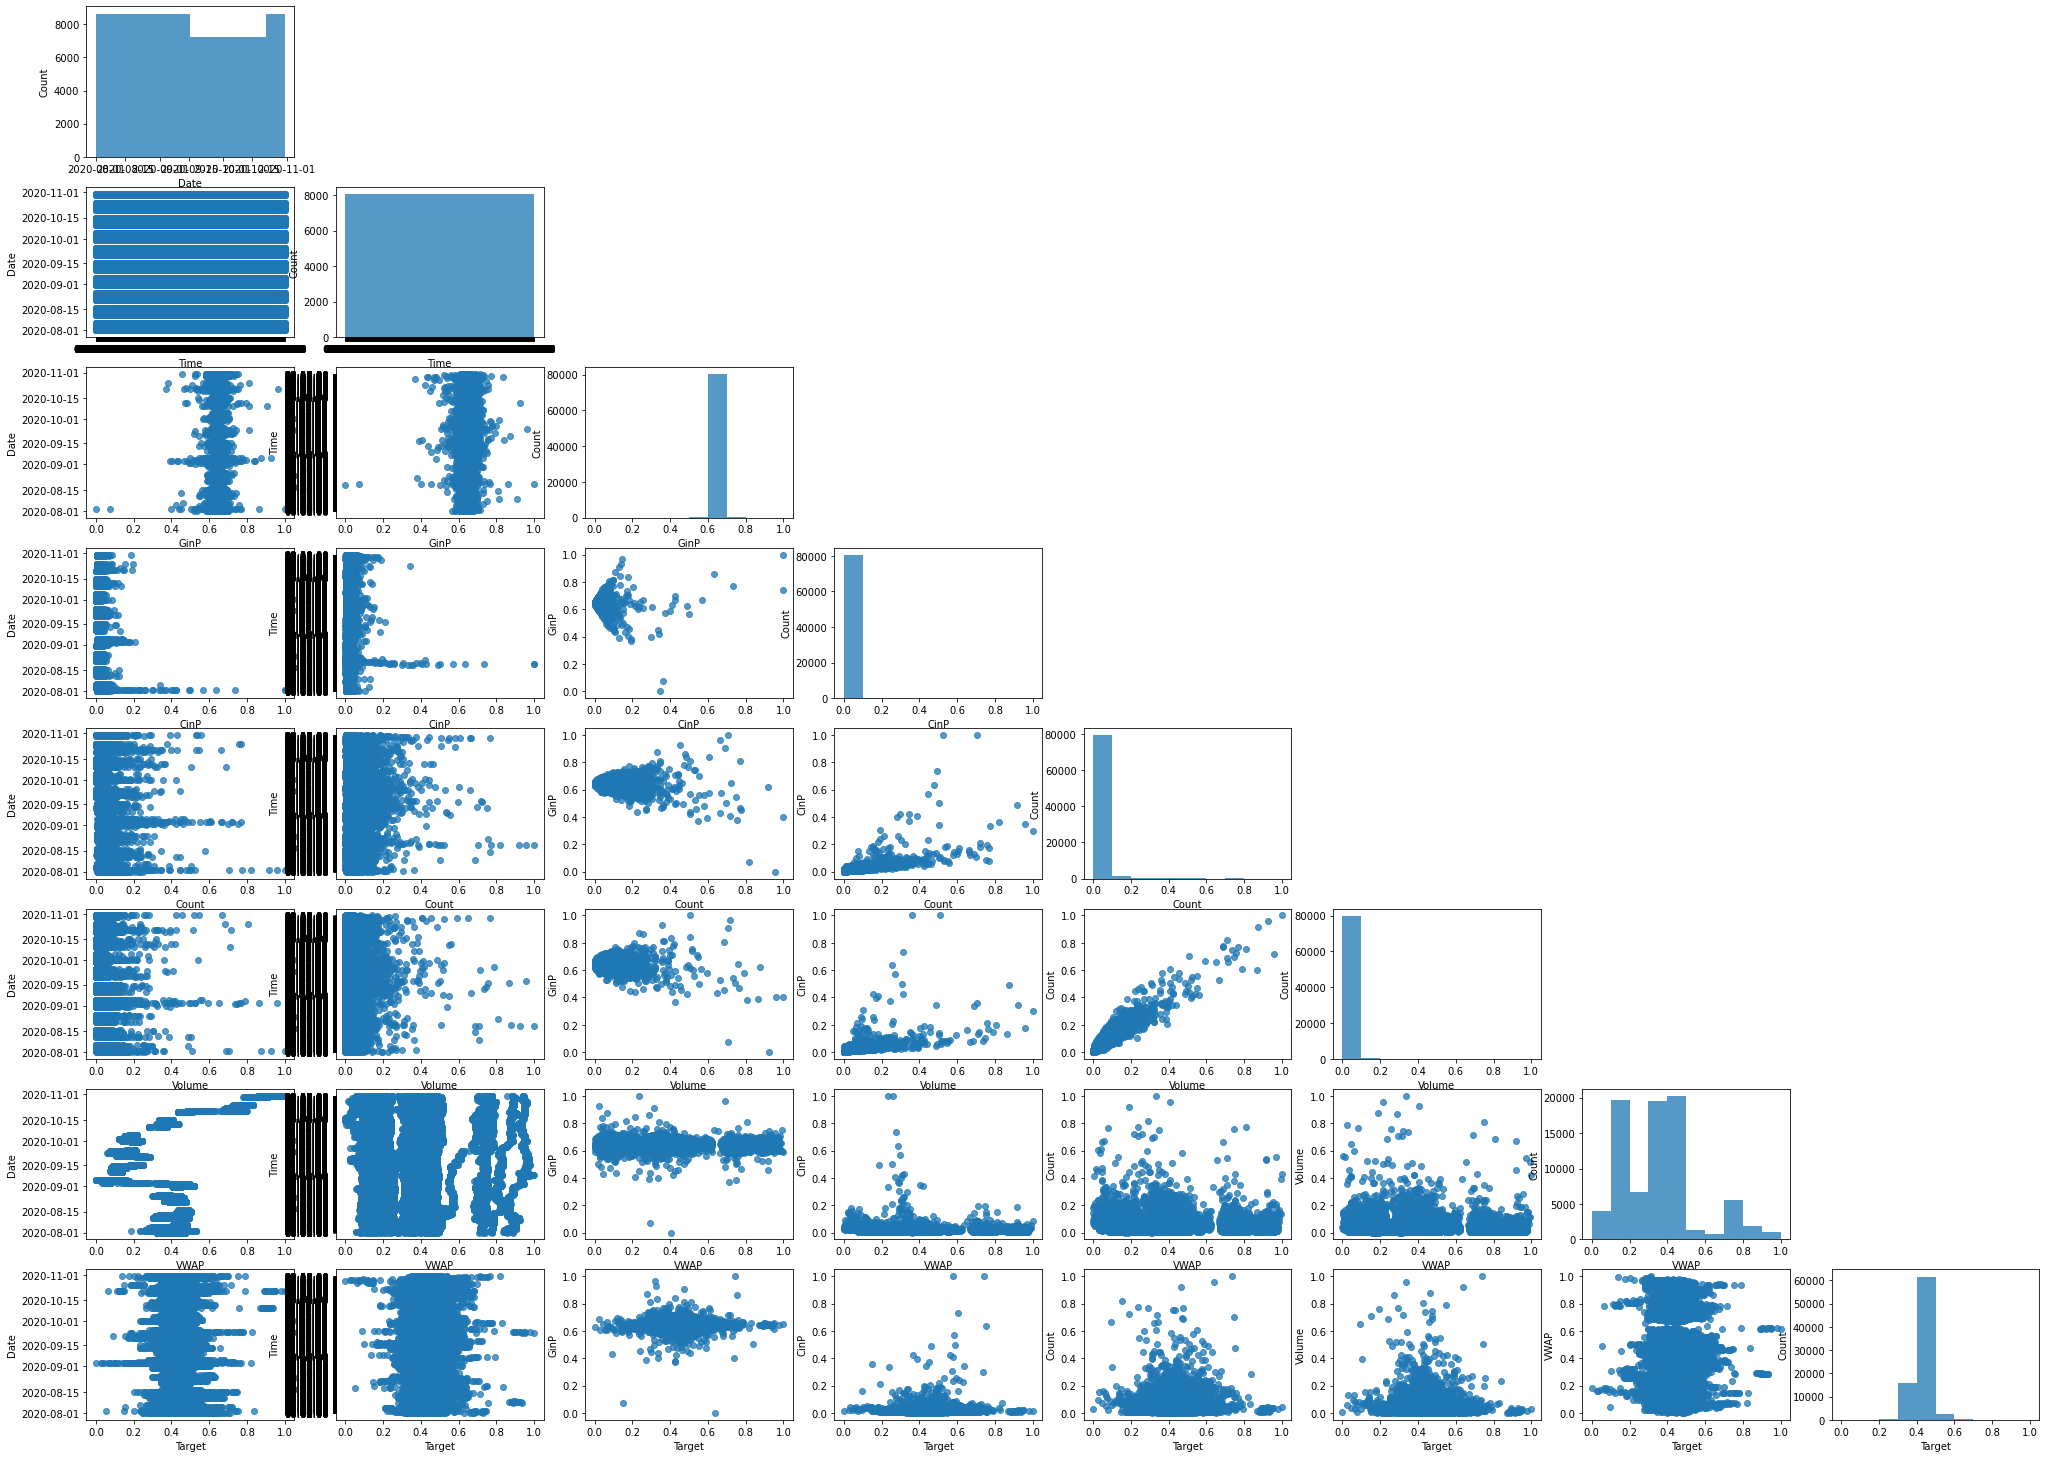

In [67]:
scatterplotmatrix(
    cryto_train_eda_btc[variables].values,
    names=variables,
    figsize=(35,26), 
    alpha=.75,
);

In [68]:
variables = ['GinP', 'CinP', 'Count', 'Volume', 'VWAP', 'Target']
cm = cryto_train_eda_btc[variables].corr().values
cm.shape

(6, 6)

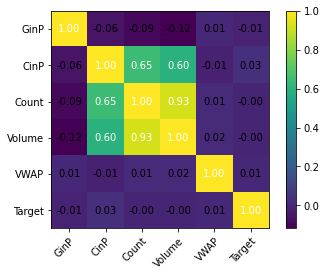

In [69]:
hm = heatmap(
    cm,
    row_names=variables,
    column_names=variables)

In [70]:
cryto_train_eda_btc.describe()

,Target,GinP,CinP,Count,Volume,VWAP,Binance Coin,Bitcoin,Bitcoin Cash,Cardano,Dogecoin,EOS.IO,Ethereum,Ethereum Classic,IOTA,Litecoin,Maker,Monero,Stellar,TRON,GinP_15min_avg_L0,GinP_15min_avg_L1,GinP_15min_avg_L2,GinP_15min_avg_L3,GinP_15min_avg_L4,GinP_15min_avg_L5,GinP_15min_avg_L6,GinP_15min_avg_L7,GinP_15min_avg_L8,GinP_15min_avg_L9,GinP_15min_avg_L10,GinP_15min_avg_L11,GinP_15min_avg_L12,GinP_15min_avg_L13,GinP_15min_avg_L14,GinP_15min_avg_L15,CinP_15min_avg_L0,CinP_15min_avg_L1,CinP_15min_avg_L2,CinP_15min_avg_L3,CinP_15min_avg_L4,CinP_15min_avg_L5,CinP_15min_avg_L6,CinP_15min_avg_L7,CinP_15min_avg_L8,CinP_15min_avg_L9,CinP_15min_avg_L10,CinP_15min_avg_L11,CinP_15min_avg_L12,CinP_15min_avg_L13,CinP_15min_avg_L14,CinP_15min_avg_L15,Count_15min_avg_L0,Count_15min_avg_L1,Count_15min_avg_L2,Count_15min_avg_L3,Count_15min_avg_L4,Count_15min_avg_L5,Count_15min_avg_L6,Count_15min_avg_L7,Count_15min_avg_L8,Count_15min_avg_L9,Count_15min_avg_L10,Count_15min_avg_L11,Count_15min_avg_L12,Count_15min_avg_L13,Count_15min_avg_L14,Count_15min_avg_L15,Volume_15min_avg_L0,Volume_15min_avg_L1,Volume_15min_avg_L2,Volume_15min_avg_L3,Volume_15min_avg_L4,Volume_15min_avg_L5,Volume_15min_avg_L6,Volume_15min_avg_L7,Volume_15min_avg_L8,Volume_15min_avg_L9,Volume_15min_avg_L10,Volume_15min_avg_L11,Volume_15min_avg_L12,Volume_15min_avg_L13,Volume_15min_avg_L14,Volume_15min_avg_L15,VWAP_15min_avg_L0,VWAP_15min_avg_L1,VWAP_15min_avg_L2,VWAP_15min_avg_L3,VWAP_15min_avg_L4,VWAP_15min_avg_L5,VWAP_15min_avg_L6,VWAP_15min_avg_L7,VWAP_15min_avg_L8,VWAP_15min_avg_L9,VWAP_15min_avg_L10,VWAP_15min_avg_L11,VWAP_15min_avg_L12,VWAP_15min_avg_L13,VWAP_15min_avg_L14,VWAP_15min_avg_L15
count,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000,80637.0000
mean,0.4274,0.6434,0.0134,0.0251,0.0142,0.3572,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.7420,0.7420,0.7420,0.7420,0.7420,0.7420,0.7420,0.7420,0.7420,0.7420,0.7420,0.7420,0.7420,0.7420,0.7420,0.7420,0.0197,0.0197,0.0197,0.0197,0.0197,0.0197,0.0197,0.0197,0.0197,0.0197,0.0197,0.0197,0.0197,0.0197,0.0190,0.0190,0.0378,0.0377,0.0378,0.0378,0.0377,0.0377,0.0377,0.0377,0.0377,0.0377,0.0377,0.0377,0.0377,0.0376,0.0376,0.0376,0.0276,0.0276,0.0276,0.0277,0.0276,0.0276,0.0276,0.0276,0.0276,0.0276,0.0276,0.0276,0.0276,0.0276,0.0276,0.0276,0.3596,0.3596,0.3595,0.3595,0.3595,0.3594,0.3594,0.3594,0.3593,0.3593,0.3592,0.3592,0.3591,0.3591,0.3591,0.3590
std,0.0416,0.0118,0.0108,0.0287,0.0244,0.2006,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0183,0.0183,0.0183,0.0183,0.0183,0.0183,0.0183,0.0182,0.0182,0.0182,0.0182,0.0182,0.0182,0.0182,0.0182,0.0182,0.0174,0.0174,0.0174,0.0174,0.0174,0.0174,0.0174,0.0174,0.0174,0.0174,0.0173,0.0173,0.0173,0.0173,0.0173,0.0173,0.0369,0.0369,0.0369,0.0369,0.0369,0.0369,0.0369,0.0369,0.0369,0.0369,0.0369,0.0369,0.0369,0.0368,0.0368,0.0368,0.0349,0.0349,0.0349,0.0349,0.0

In [71]:
cryto_train_eda_btc.columns.to_list()[20:]

['Stellar',
 'TRON',
 'GinP_15min_avg_L0',
 'GinP_15min_avg_L1',
 'GinP_15min_avg_L2',
 'GinP_15min_avg_L3',
 'GinP_15min_avg_L4',
 'GinP_15min_avg_L5',
 'GinP_15min_avg_L6',
 'GinP_15min_avg_L7',
 'GinP_15min_avg_L8',
 'GinP_15min_avg_L9',
 'GinP_15min_avg_L10',
 'GinP_15min_avg_L11',
 'GinP_15min_avg_L12',
 'GinP_15min_avg_L13',
 'GinP_15min_avg_L14',
 'GinP_15min_avg_L15',
 'CinP_15min_avg_L0',
 'CinP_15min_avg_L1',
 'CinP_15min_avg_L2',
 'CinP_15min_avg_L3',
 'CinP_15min_avg_L4',
 'CinP_15min_avg_L5',
 'CinP_15min_avg_L6',
 'CinP_15min_avg_L7',
 'CinP_15min_avg_L8',
 'CinP_15min_avg_L9',
 'CinP_15min_avg_L10',
 'CinP_15min_avg_L11',
 'CinP_15min_avg_L12',
 'CinP_15min_avg_L13',
 'CinP_15min_avg_L14',
 'CinP_15min_avg_L15',
 'Count_15min_avg_L0',
 'Count_15min_avg_L1',
 'Count_15min_avg_L2',
 'Count_15min_avg_L3',
 'Count_15min_avg_L4',
 'Count_15min_avg_L5',
 'Count_15min_avg_L6',
 'Count_15min_avg_L7',
 'Count_15min_avg_L8',
 'Count_15min_avg_L9',
 'Count_15min_avg_L10',
 'Count_1

In [72]:
variables = ['GinP_15min_avg_L0',
 'GinP_15min_avg_L1',
 'GinP_15min_avg_L2',
 'GinP_15min_avg_L3',
 'CinP_15min_avg_L0',
 'CinP_15min_avg_L1',
 'CinP_15min_avg_L2',
 'CinP_15min_avg_L3',
 'Count_15min_avg_L0',
 'Count_15min_avg_L1',
 'Count_15min_avg_L2',
 'Count_15min_avg_L3',
 'Volume_15min_avg_L0',
 'Volume_15min_avg_L1',
 'Volume_15min_avg_L2',
 'Volume_15min_avg_L3',
 'VWAP_15min_avg_L0',
 'VWAP_15min_avg_L1',
 'VWAP_15min_avg_L2',
 'VWAP_15min_avg_L3',
 'Target']
cm = cryto_train_eda_btc[variables].corr().values
cm.shape

(21, 21)

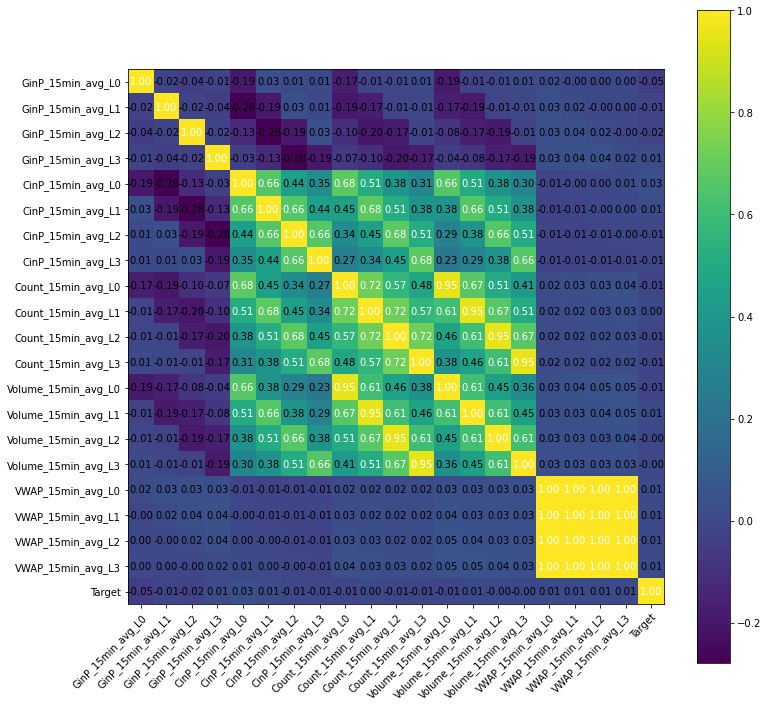

In [73]:
hm = heatmap(
    cm,
    row_names=variables,
    column_names=variables,
    figsize=(12,12)
)

## Perform EDA on all crypto 

In [74]:
cryto_train_eda.head()

,Target,Date,Time,GinP,CinP,Count,Volume,VWAP,Binance Coin,Bitcoin,Bitcoin Cash,Cardano,Dogecoin,EOS.IO,Ethereum,Ethereum Classic,IOTA,Litecoin,Maker,Monero,Stellar,TRON,GinP_15min_avg_L0,GinP_15min_avg_L1,GinP_15min_avg_L2,GinP_15min_avg_L3,GinP_15min_avg_L4,GinP_15min_avg_L5,GinP_15min_avg_L6,GinP_15min_avg_L7,GinP_15min_avg_L8,GinP_15min_avg_L9,GinP_15min_avg_L10,GinP_15min_avg_L11,GinP_15min_avg_L12,GinP_15min_avg_L13,GinP_15min_avg_L14,GinP_15min_avg_L15,CinP_15min_avg_L0,CinP_15min_avg_L1,CinP_15min_avg_L2,CinP_15min_avg_L3,CinP_15min_avg_L4,CinP_15min_avg_L5,CinP_15min_avg_L6,CinP_15min_avg_L7,CinP_15min_avg_L8,CinP_15min_avg_L9,CinP_15min_avg_L10,CinP_15min_avg_L11,CinP_15min_avg_L12,CinP_15min_avg_L13,CinP_15min_avg_L14,CinP_15min_avg_L15,Count_15min_avg_L0,Count_15min_avg_L1,Count_15min_avg_L2,Count_15min_avg_L3,Count_15min_avg_L4,Count_15min_avg_L5,Count_15min_avg_L6,Count_15min_avg_L7,Count_15min_avg_L8,Count_15min_avg_L9,Count_15min_avg_L10,Count_15min_avg_L11,Count_15min_avg_L12,Count_15min_avg_L13,Count_15min_avg_L14,Count_15min_avg_L15,Volume_15min_avg_L0,Volume_15min_avg_L1,Volume_15min_avg_L2,Volume_15min_avg_L3,Volume_15min_avg_L4,Volume_15min_avg_L5,Volume_15min_avg_L6,Volume_15min_avg_L7,Volume_15min_avg_L8,Volume_15min_avg_L9,Volume_15min_avg_L10,Volume_15min_avg_L11,Volume_15min_avg_L12,Volume_15min_avg_L13,Volume_15min_avg_L14,Volume_15min_avg_L15,VWAP_15min_avg_L0,VWAP_15min_avg_L1,VWAP_15min_avg_L2,VWAP_15min_avg_L3,VWAP_15min_avg_L4,VWAP_15min_avg_L5,VWAP_15min_avg_L6,VWAP_15min_avg_L7,VWAP_15min_avg_L8,VWAP_15min_avg_L9,VWAP_15min_avg_L10,VWAP_15min_avg_L11,VWAP_15min_avg_L12,VWAP_15min_avg_L13,VWAP_15min_avg_L14,VWAP_15min_avg_L15
15197598,-0.0028,2020-08-01,00:01:00,0.0000,0.0001,14.0000,11646.9200,0.2999,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0001,0.0001,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0001,-0.0001,-0.0001,0.0000,-0.0000,-0.0001,0.0001,0.0001,0.0001,0.0002,0.0003,0.0002,0.0002,0.0003,0.0003,0.0002,0.0005,0.0003,0.0003,0.0003,0.0002,0.0002,0.0005,0.0003,5.8000,4.2667,8.1333,4.2667,4.2667,4.2667,6.6667,3.1333,13.4000,6.0667,5.8667,5.0000,3.6667,4.1333,10.2000,5.8000,6323.0993,4190.4911,7095.8765,4043.5564,4756.5875,3041.9748,8453.5420,1706.9402,13866.7987,7675.3649,4947.5216,3630.1398,5089.4398,4341.0724,12341.6622,6298.2042,0.2989,0.2984,0.2989,0.2995,0.3000,0.3004,0.3012,0.3017,0.3019,0.3020,0.3001,0.2994,0.3003,0.3010,0.3016,0.2995
15197602,-0.0035,2020-08-01,00:01:00,0.0367,0.2600,13.0000,15.2563,84.7036,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0141,0.0083,0.0011,0.0171,-0.0114,0.0057,-0.0113,0.0090,-0.0034,-0.0009,0.0016,0.0053,-0.0071,-0.0114,0.0156,0.0101,0.1485,0.1206,0.1123,0.1051,0.0985,0.0732,0.0533,0.0793,0.0927,0.0640,0.1227,0.0673,0.1630,0.1460,0.1147,0.1140,39.6000,36.0000,31.4000,25.2000,15.8667,13.8667,15.1333,18.8667,26.0667,16.1333,15.3333,9.4667,32.9333,50.0000,35.3333,24.3333,89.9815,81.1212,48.7806,91.6001,46.7885,42.3771,27.5101,41.3589,54.4559,51.7119,61.1586,38.1033,111.0665,73.7860,64.4368,108.5395,84.5748,84.2051,84.0807,83.6192,83.7429,83.9136,83.7988,83.8066,83.7735,83.7742,83.6898,83.6348,83.6058,83.7961,83.6806,83.4392
15197601,0.0064,2020-08-01,00:01:00,-0.0001,0.0004,189.0000,466824.5874,0.0972,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.0000,0.0003,0.0003,0.0002,0.0002,0.0002,0.0002,0.0002,0.0003,0.0003,0.0003,0.0003,0.0003,0.0002,0.0003,0.0003,0.0002,85.4000,80.0000,62.4000,56.3333,44.7333,41.0000,41.7333,50.0667,67.4000,44.1333,31.6667,49.8000,76.8000,42.6667,70.7333,57.0000,229019.3635,211150.0946,174850.8199,132852.1309,122105.1783,105720.7375,76327.0236,87749.3894,140022.3932,94723.6255,40595.2784,137696.1851,212013.6678,102962.1397,154761.2437,108054.4142,0.0968,0.0967,0.0964,0.0963,0.0965,0.0966,0.0965,0.0966,0.0967,0.0968,0.0967,0.0968,0.0969,0.0967,0.0967,0.0966
15197600,0.0008,2020-08-01,00:01:00,0.0000,0.0000,138.0000,2716580.9035,0.0197,0,0,0,0,0,0,0,0,0,

In [75]:
# Scales all features except for Time and one-hot encodings
cols = [x for x in cryto_train_eda.columns if x not in  ['Date', 'Time', 'Binance Coin','Bitcoin', 'Bitcoin Cash',
                                                        'Cardano','Dogecoin','EOS.IO', 'Ethereum','Ethereum Classic',
                                                        'IOTA', 'Litecoin', 'Maker', 'Monero','Stellar', 'TRON',]]
print(cols)

scaler=MinMaxScaler(feature_range=(0,1))

cryto_train_eda[cols] = scaler.fit_transform(cryto_train_eda[cols])

['Target', 'GinP', 'CinP', 'Count', 'Volume', 'VWAP', 'GinP_15min_avg_L0', 'GinP_15min_avg_L1', 'GinP_15min_avg_L2', 'GinP_15min_avg_L3', 'GinP_15min_avg_L4', 'GinP_15min_avg_L5', 'GinP_15min_avg_L6', 'GinP_15min_avg_L7', 'GinP_15min_avg_L8', 'GinP_15min_avg_L9', 'GinP_15min_avg_L10', 'GinP_15min_avg_L11', 'GinP_15min_avg_L12', 'GinP_15min_avg_L13', 'GinP_15min_avg_L14', 'GinP_15min_avg_L15', 'CinP_15min_avg_L0', 'CinP_15min_avg_L1', 'CinP_15min_avg_L2', 'CinP_15min_avg_L3', 'CinP_15min_avg_L4', 'CinP_15min_avg_L5', 'CinP_15min_avg_L6', 'CinP_15min_avg_L7', 'CinP_15min_avg_L8', 'CinP_15min_avg_L9', 'CinP_15min_avg_L10', 'CinP_15min_avg_L11', 'CinP_15min_avg_L12', 'CinP_15min_avg_L13', 'CinP_15min_avg_L14', 'CinP_15min_avg_L15', 'Count_15min_avg_L0', 'Count_15min_avg_L1', 'Count_15min_avg_L2', 'Count_15min_avg_L3', 'Count_15min_avg_L4', 'Count_15min_avg_L5', 'Count_15min_avg_L6', 'Count_15min_avg_L7', 'Count_15min_avg_L8', 'Count_15min_avg_L9', 'Count_15min_avg_L10', 'Count_15min_avg_L1

In [76]:
cryto_train_eda

,Target,Date,Time,GinP,CinP,Count,Volume,VWAP,Binance Coin,Bitcoin,Bitcoin Cash,Cardano,Dogecoin,EOS.IO,Ethereum,Ethereum Classic,IOTA,Litecoin,Maker,Monero,Stellar,TRON,GinP_15min_avg_L0,GinP_15min_avg_L1,GinP_15min_avg_L2,GinP_15min_avg_L3,GinP_15min_avg_L4,GinP_15min_avg_L5,GinP_15min_avg_L6,GinP_15min_avg_L7,GinP_15min_avg_L8,GinP_15min_avg_L9,GinP_15min_avg_L10,GinP_15min_avg_L11,GinP_15min_avg_L12,GinP_15min_avg_L13,GinP_15min_avg_L14,GinP_15min_avg_L15,CinP_15min_avg_L0,CinP_15min_avg_L1,CinP_15min_avg_L2,CinP_15min_avg_L3,CinP_15min_avg_L4,CinP_15min_avg_L5,CinP_15min_avg_L6,CinP_15min_avg_L7,CinP_15min_avg_L8,CinP_15min_avg_L9,CinP_15min_avg_L10,CinP_15min_avg_L11,CinP_15min_avg_L12,CinP_15min_avg_L13,CinP_15min_avg_L14,CinP_15min_avg_L15,Count_15min_avg_L0,Count_15min_avg_L1,Count_15min_avg_L2,Count_15min_avg_L3,Count_15min_avg_L4,Count_15min_avg_L5,Count_15min_avg_L6,Count_15min_avg_L7,Count_15min_avg_L8,Count_15min_avg_L9,Count_15min_avg_L10,Count_15min_avg_L11,Count_15min_avg_L12,Count_15min_avg_L13,Count_15min_avg_L14,Count_15min_avg_L15,Volume_15min_avg_L0,Volume_15min_avg_L1,Volume_15min_avg_L2,Volume_15min_avg_L3,Volume_15min_avg_L4,Volume_15min_avg_L5,Volume_15min_avg_L6,Volume_15min_avg_L7,Volume_15min_avg_L8,Volume_15min_avg_L9,Volume_15min_avg_L10,Volume_15min_avg_L11,Volume_15min_avg_L12,Volume_15min_avg_L13,Volume_15min_avg_L14,Volume_15min_avg_L15,VWAP_15min_avg_L0,VWAP_15min_avg_L1,VWAP_15min_avg_L2,VWAP_15min_avg_L3,VWAP_15min_avg_L4,VWAP_15min_avg_L5,VWAP_15min_avg_L6,VWAP_15min_avg_L7,VWAP_15min_avg_L8,VWAP_15min_avg_L9,VWAP_15min_avg_L10,VWAP_15min_avg_L11,VWAP_15min_avg_L12,VWAP_15min_avg_L13,VWAP_15min_avg_L14,VWAP_15min_avg_L15
15197598,0.4592,2020-08-01,00:01:00,0.6434,0.0000,0.0003,0.0001,0.0000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.7419,0.7419,0.7419,0.7419,0.7419,0.7419,0.7419,0.7419,0.7419,0.7419,0.7419,0.7419,0.7419,0.7419,0.7419,0.7419,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0002,0.0001,0.0003,0.0001,0.0001,0.0001,0.0002,0.0001,0.0005,0.0002,0.0002,0.0002,0.0001,0.0001,0.0004,0.0002,0.0001,0.0001,0.0001,0.0001,0.0001,0.0000,0.0001,0.0000,0.0002,0.0001,0.0001,0.0000,0.0001,0.0001,0.0002,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
15197602,0.4575,2020-08-01,00:01:00,0.6435,0.0001,0.0003,0.0000,0.0060,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.7420,0.7420,0.7419,0.7421,0.7418,0.7420,0.7418,0.7420,0.7419,0.7419,0.7419,0.7420,0.7418,0.7418,0.7421,0.7420,0.0002,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0002,0.0002,0.0001,0.0001,0.0017,0.0015,0.0013,0.0010,0.0006,0.0005,0.0006,0.0008,0.0011,0.0006,0.0006,0.0003,0.0014,0.0021,0.0015,0.0010,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0061,0.0060,0.0060,0.0060,0.0060,0.0060,0.0060,0.0060,0.0060,0.0060,0.0060,0.0060,0.0060,0.0060,0.0060,0.0060
15197601,0.4814,2020-08-01,00:01:00,0.6434,0.0000,0.0049,0.0035,0.0000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.7419,0.7419,0.7419,0.7419,0.7419,0.7419,0.7419,0.7419,0.7419,0.7419,0.7419,0.7419,0.7419,0.7419,0.7419,0.7419,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0036,0.0034,0.0026,0.0024,0.0019,0.0017,0.0017,0.0021,0.0029,0.0018,0.0013,0.0021,0.0033,0.0018,0.0030,0.0024,0.0029,0.0026,0.0022,0.0017,0.0015,0.0013,0.0010,0.0011,0.0017,0.0012,0.0005,0.0017,0.0026,0.0013,0.0019,0.0013,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
15197600,0.4681,2020-08-01,00:01:00,0.6434,0.0000,0.0036,0.0204,0.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.7419,0.7419,0.7419,0.7419,0.7419,0.7419,0.7419,0.7419,0.7419,0.7419,0.7419,0.7419,0.7419,0.7419,0.7419,0.7419,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0018,0.001

In [77]:
cryto_train_eda['Time'] = cryto_train_eda['Time'].apply(lambda x: x.strftime('%H:%M:%S'))

In [78]:
variables = ['Date', 'GinP', 'CinP', 'Count', 'Volume', 'VWAP', 'Target']

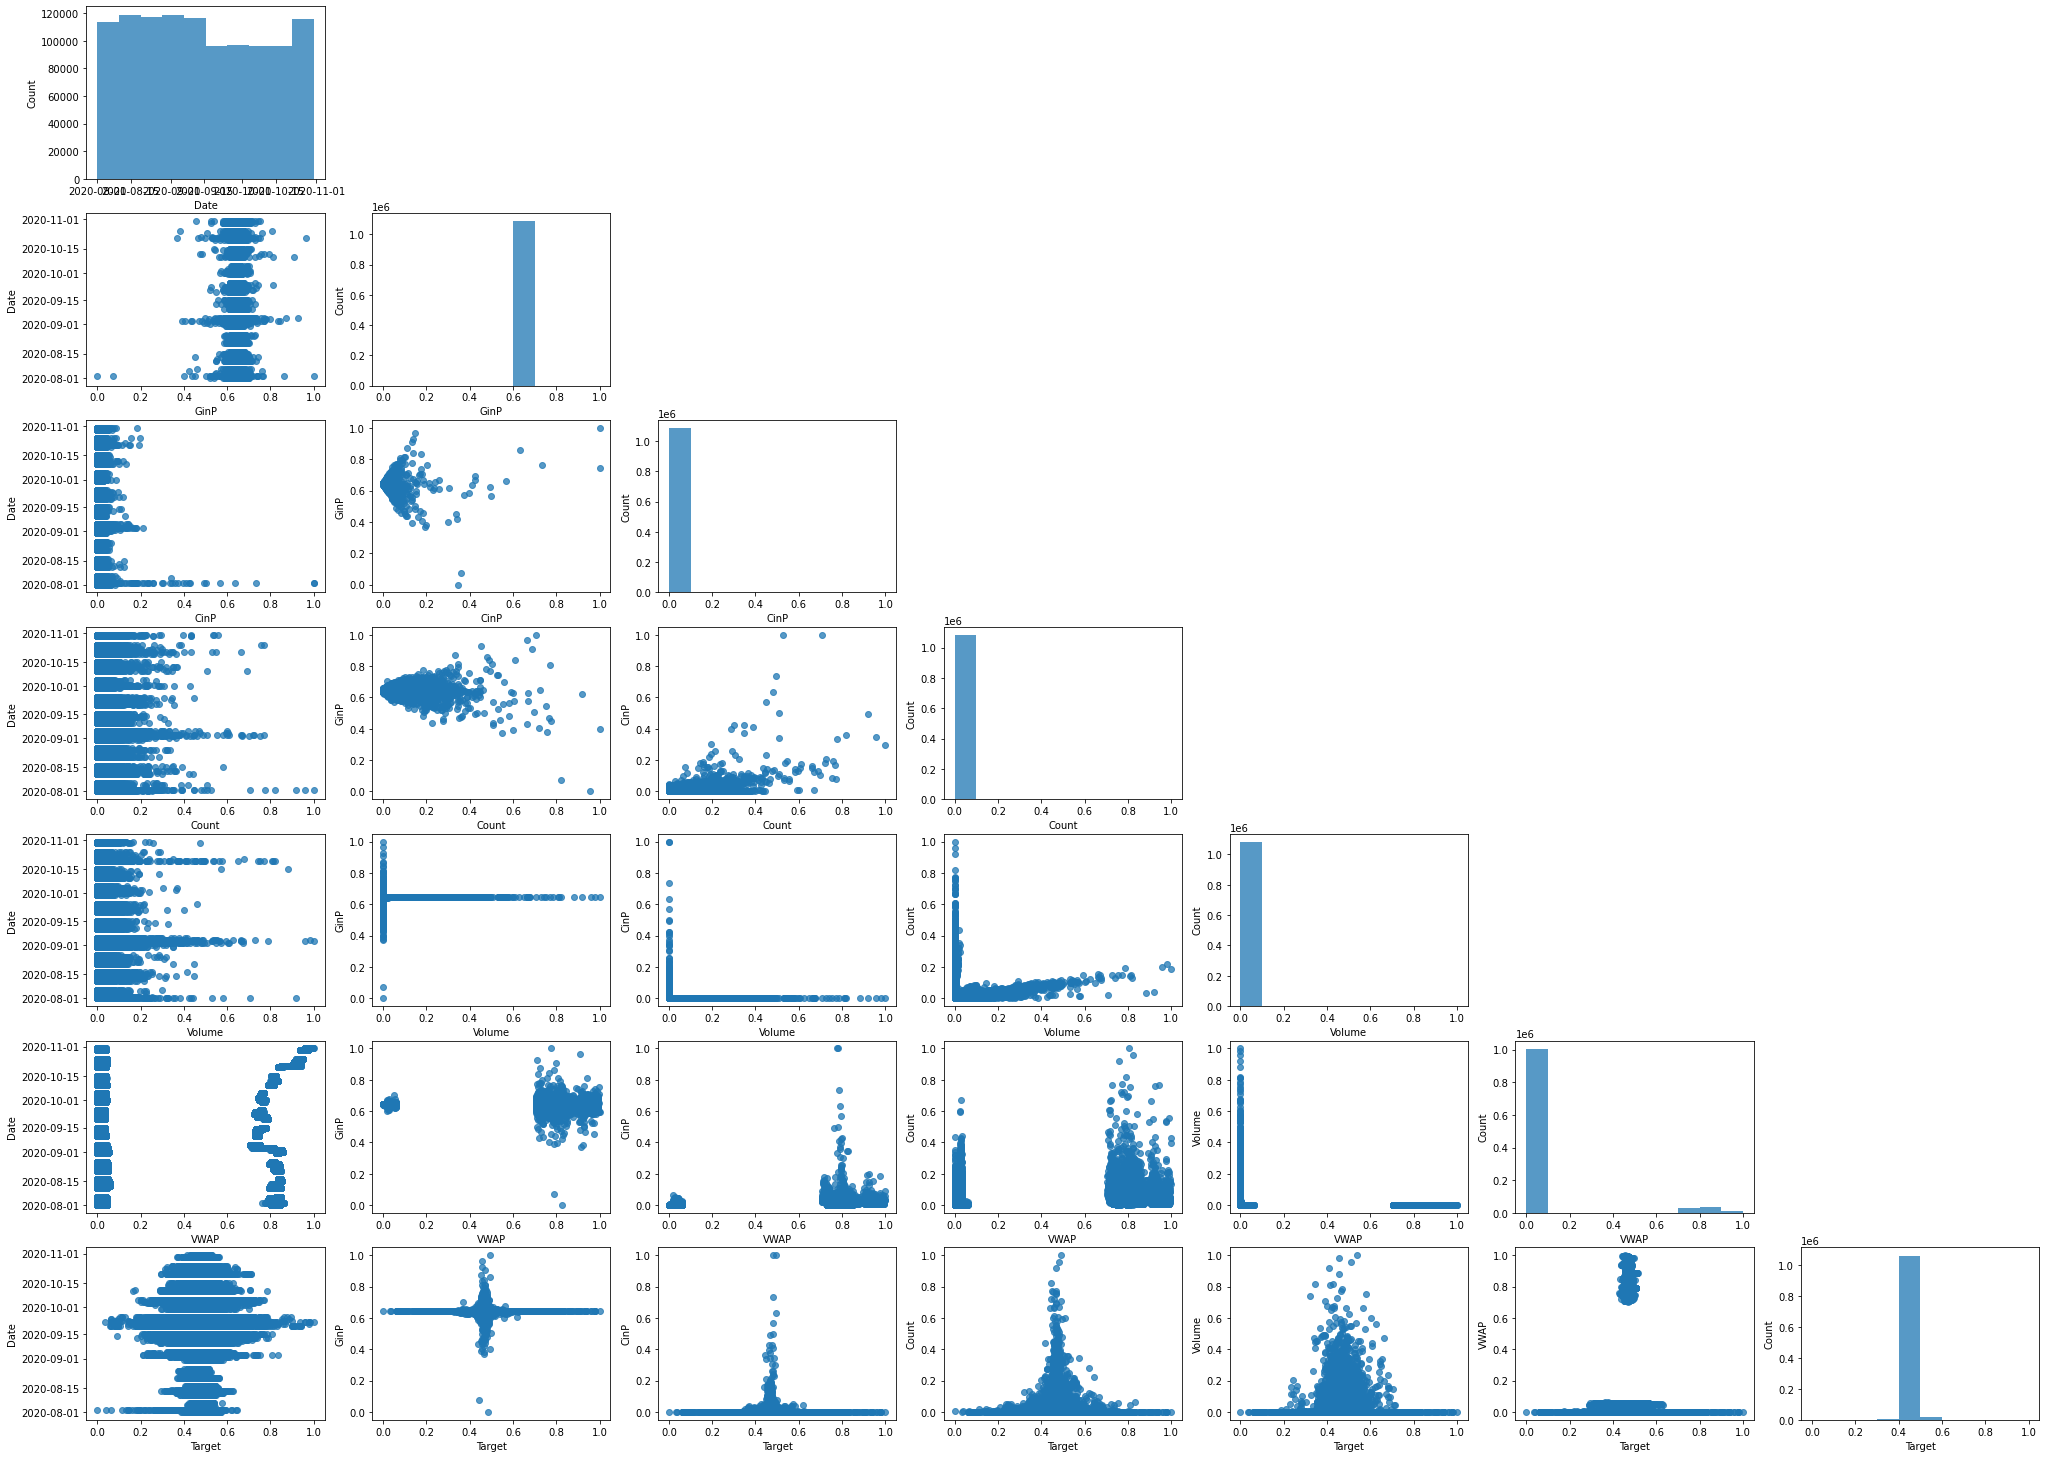

In [79]:
scatterplotmatrix(
    cryto_train_eda[variables].values,
    names=variables,
    figsize=(35,26), 
    alpha=.75,
);

In [80]:
variables = ['GinP', 'CinP', 'Count', 'Volume', 'VWAP', 'Target']
cm = cryto_train_eda[variables].corr().values
cm.shape

(6, 6)

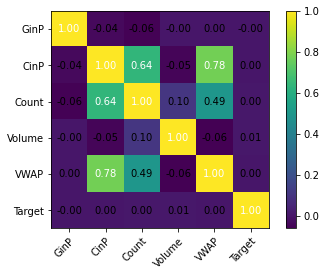

In [81]:
hm = heatmap(
    cm,
    row_names=variables,
    column_names=variables)

In [82]:
variables = ['GinP_15min_avg_L0',
 'GinP_15min_avg_L1',
 'GinP_15min_avg_L2',
 'GinP_15min_avg_L3',
 'CinP_15min_avg_L0',
 'CinP_15min_avg_L1',
 'CinP_15min_avg_L2',
 'CinP_15min_avg_L3',
 'Count_15min_avg_L0',
 'Count_15min_avg_L1',
 'Count_15min_avg_L2',
 'Count_15min_avg_L3',
 'Volume_15min_avg_L0',
 'Volume_15min_avg_L1',
 'Volume_15min_avg_L2',
 'Volume_15min_avg_L3',
 'VWAP_15min_avg_L0',
 'VWAP_15min_avg_L1',
 'VWAP_15min_avg_L2',
 'VWAP_15min_avg_L3',
 'Target']
cm = cryto_train_eda[variables].corr().values
cm.shape

(21, 21)

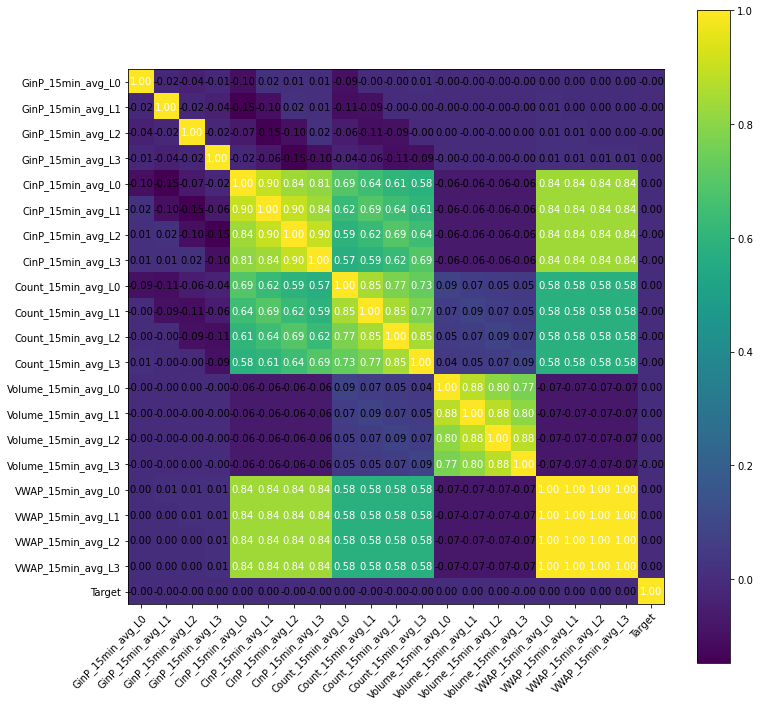

In [83]:
hm = heatmap(
    cm,
    row_names=variables,
    column_names=variables,
    figsize=(12,12)
)

## Baseline Averages for Bitcoin

In [84]:
# Extract rows with 'Bitcoin' column equal to 1 for training set
crypto_train_Y_bitcoin = crypto_train_Y[crypto_train_X['Bitcoin'] == 1]
crypto_train_X_bitcoin = crypto_train_X[crypto_train_X['Bitcoin'] == 1]

# Extract rows with 'Bitcoin' column equal to 1 for validation set
crypto_val_Y_bitcoin = crypto_val_Y[crypto_val_X['Bitcoin'] == 1]
crypto_val_X_bitcoin = crypto_val_X[crypto_val_X['Bitcoin'] == 1]

# Extract rows with 'Bitcoin' column equal to 1 for test set
crypto_test_Y_bitcoin = crypto_test_Y[crypto_test_X['Bitcoin'] == 1]
crypto_test_X_bitcoin = crypto_test_X[crypto_test_X['Bitcoin'] == 1]

In [85]:
print('train dataset Y', crypto_train_Y_bitcoin.shape)
print('train dataset X', crypto_train_X_bitcoin.shape)
print('validation dataset Y', crypto_val_Y_bitcoin.shape)
print('validation dataset X', crypto_val_X_bitcoin.shape)
print('test dataset Y', crypto_test_Y_bitcoin.shape)
print('test dataset X', crypto_test_X_bitcoin.shape)

train dataset Y (80637,)
train dataset X (80637, 104)
validation dataset Y (25920,)
validation dataset X (25920, 104)
test dataset Y (25891,)
test dataset X (25891, 104)


In [86]:
crypto_train_X_bitcoin

,Date,Time,GinP,CinP,Count,Volume,VWAP,Binance Coin,Bitcoin,Bitcoin Cash,Cardano,Dogecoin,EOS.IO,Ethereum,Ethereum Classic,IOTA,Litecoin,Maker,Monero,Stellar,TRON,GinP_15min_avg_L0,GinP_15min_avg_L1,GinP_15min_avg_L2,GinP_15min_avg_L3,GinP_15min_avg_L4,GinP_15min_avg_L5,GinP_15min_avg_L6,GinP_15min_avg_L7,GinP_15min_avg_L8,GinP_15min_avg_L9,GinP_15min_avg_L10,GinP_15min_avg_L11,GinP_15min_avg_L12,GinP_15min_avg_L13,GinP_15min_avg_L14,GinP_15min_avg_L15,CinP_15min_avg_L0,CinP_15min_avg_L1,CinP_15min_avg_L2,CinP_15min_avg_L3,CinP_15min_avg_L4,CinP_15min_avg_L5,CinP_15min_avg_L6,CinP_15min_avg_L7,CinP_15min_avg_L8,CinP_15min_avg_L9,CinP_15min_avg_L10,CinP_15min_avg_L11,CinP_15min_avg_L12,CinP_15min_avg_L13,CinP_15min_avg_L14,CinP_15min_avg_L15,Count_15min_avg_L0,Count_15min_avg_L1,Count_15min_avg_L2,Count_15min_avg_L3,Count_15min_avg_L4,Count_15min_avg_L5,Count_15min_avg_L6,Count_15min_avg_L7,Count_15min_avg_L8,Count_15min_avg_L9,Count_15min_avg_L10,Count_15min_avg_L11,Count_15min_avg_L12,Count_15min_avg_L13,Count_15min_avg_L14,Count_15min_avg_L15,Volume_15min_avg_L0,Volume_15min_avg_L1,Volume_15min_avg_L2,Volume_15min_avg_L3,Volume_15min_avg_L4,Volume_15min_avg_L5,Volume_15min_avg_L6,Volume_15min_avg_L7,Volume_15min_avg_L8,Volume_15min_avg_L9,Volume_15min_avg_L10,Volume_15min_avg_L11,Volume_15min_avg_L12,Volume_15min_avg_L13,Volume_15min_avg_L14,Volume_15min_avg_L15,VWAP_15min_avg_L0,VWAP_15min_avg_L1,VWAP_15min_avg_L2,VWAP_15min_avg_L3,VWAP_15min_avg_L4,VWAP_15min_avg_L5,VWAP_15min_avg_L6,VWAP_15min_avg_L7,VWAP_15min_avg_L8,VWAP_15min_avg_L9,VWAP_15min_avg_L10,VWAP_15min_avg_L11,VWAP_15min_avg_L12,VWAP_15min_avg_L13,VWAP_15min_avg_L14,VWAP_15min_avg_L15,Year,Month,Day
15197593,2020-08-01,00:01:00,19.3505,46.0200,2584.0000,209.9444,11379.4243,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.6535,1.4913,1.4902,-0.4465,-2.5862,-0.4725,-1.4074,-0.3757,-1.8044,1.9359,0.2540,3.8472,-1.7564,-2.4389,3.7719,1.3586,27.5193,24.5000,23.6207,21.5680,30.4720,23.7807,26.7096,32.7517,39.5073,31.2921,28.3148,34.3553,30.7860,31.9887,32.1414,26.1319,882.0000,938.4667,881.0667,920.9333,1497.0667,942.1333,996.8667,1424.3333,1566.8000,1511.0000,1021.3333,1610.6667,1222.7333,1184.8000,1647.4667,1150.3333,60.6292,67.4945,52.8863,62.3255,112.7026,61.6790,64.8269,127.4805,94.5458,105.5815,62.7327,114.9973,86.6437,95.0586,176.7296,103.1066,11342.9721,11335.0425,11310.2522,11309.2734,11315.5751,11358.2807,11361.4510,11378.6120,11391.5386,11404.2748,11384.4024,11372.1457,11342.4300,11381.2943,11372.3589,11347.7699,2020,8,1
15197606,2020-08-01,00:02:00,2.4486,32.2200,1504.0000,113.0993,11388.7585,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.6201,1.6169,1.3150,-0.7616,-1.0174,-1.4227,-1.2659,-1.3777,0.1179,0.8634,0.5966,4.7832,-2.1218,-3.1400,3.5808,1.1884,27.9287,24.9553,23.2773,21.3907,29.7766,24.8100,26.5956,31.2457,39.5767,32.5155,28.1141,33.1800,28.7633,34.8133,33.1801,25.9759,916.2000,957.2667,847.9333,936.6667,1417.9333,1018.4667,1016.6667,1230.1333,1668.0667,1611.3333,999.7333,1502.2667,1038.0000,1408.3333,1730.3333,1124.4667,63.7663,67.6215,51.5085,62.5243,109.0035,67.9919,64.0209,96.8654,120.5642,112.3342,60.8771,110.7522,64.0830,115.4408,182.3778,101.0217,11346.0386,11336.5091,11311.7406,11308.7808,11313.0661,11357.6254,11359.6221,11377.2421,11391.2552,11405.4195,11384.5207,11376.3591,11340.9056,11377.2874,11376.0442,11348.7295,2020,8,1
15197619,2020-08-01,00:03:00,-4.2501,37.6500,1305.0000,112.5446,11388.8761,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.3935,1.7815,1.1674,-1.1499,-0.6733,-1.1737,-0.6724,-1.2405,-0.5450,0.5515,1.4004,2.4173,-0.7733,-2.8986,3.6666,0.5366,29.0087,24.6560,23.4967,21.3993,29.3233,24.8673,26.0923,31.2104,39.7127,32.8435,27.5195,32.7247,29.8453,34.4000,33.8981,25.7899,941.8667,962.9333,844.2000,928.2000,1402.9333,1009.9333,1019.4667,1206.9333,1686.9333,1638.8667,976.6000,1422.8667,1132.2000,1388.4667,1773.4667,1058.1333,68.9985,65.4063,52.6990,62.3091,107.5501,68.2484,61.3949,97.5348,123.2829,114.1408,57.7453,103.9796,70.7928,113.5735,185.0988,94.7533,11349.0822,11338

In [108]:
# Scales all features except for Time and one-hot encodings
cols = [x for x in crypto_train_X_bitcoin.columns if x not in  ['Date', 'Time', 'Binance Coin','Bitcoin', 'Bitcoin Cash',
                                                        'Cardano','Dogecoin','EOS.IO', 'Ethereum','Ethereum Classic',
                                                        'IOTA', 'Litecoin', 'Maker', 'Monero','Stellar', 'TRON',]]

crypto_train_X_bitcoin_scaled = crypto_train_X_bitcoin.copy()
crypto_train_X_bitcoin_scaled = scaler.fit_transform(crypto_train_X_bitcoin_scaled[cols])

crypto_val_X_bitcoin_scaled = crypto_val_X_bitcoin.copy()
crypto_val_X_bitcoin_scaled = scaler.transform(crypto_val_X_bitcoin[cols])

crypto_test_X_bitcoin_scaled = crypto_test_X_bitcoin.copy()
crypto_test_X_bitcoin_scaled = scaler.transform(crypto_test_X_bitcoin[cols])


crypto_train_Y_bitcoin_scaled = scaler.fit_transform(crypto_train_Y_bitcoin.values.reshape(-1, 1))
crypto_val_Y_bitcoin_scaled = scaler.transform(crypto_val_Y_bitcoin.values.reshape(-1, 1))
crypto_test_Y_bitcoin_scaled = scaler.transform(crypto_test_Y_bitcoin.values.reshape(-1, 1))

In [109]:
crypto_train_X_bitcoin_scaled

array([[0.67473979, 0.02327049, 0.06469356, ..., 0.        , 0.        ,
        0.        ],
       [0.64736896, 0.01601161, 0.0364065 , ..., 0.        , 0.        ,
        0.        ],
       [0.63652115, 0.01886783, 0.03119434, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.65182943, 0.01332528, 0.00557884, ..., 0.        , 1.        ,
        1.        ],
       [0.64378064, 0.01296604, 0.00688842, ..., 0.        , 1.        ,
        1.        ],
       [0.63939874, 0.01435996, 0.01458879, ..., 0.        , 1.        ,
        1.        ]])

In [110]:
crypto_train_Y_bitcoin

15197593   -0.0010
15197606   -0.0017
15197619   -0.0018
15197633   -0.0026
15197647   -0.0029
             ...  
16978793    0.0007
16978806   -0.0000
16978819    0.0004
16978832    0.0005
16978845    0.0020
Name: Target, Length: 80637, dtype: float64

In [111]:
#average target value for bitcoin in the training

btc_average = np.mean(crypto_train_Y_bitcoin_scaled)


print(btc_average)


print(
    'MSE validation baseline model:', np.mean((crypto_val_Y_bitcoin_scaled - btc_average)**2)
)

print(
    'MSE test baseline model:', np.mean((crypto_test_Y_bitcoin_scaled - btc_average)**2)
)


0.4274434107272056
MSE validation baseline model: 0.0015556107539970421
MSE test baseline model: 0.0013731535027167983


## Linear Model

In [112]:
def plot_loss(model, history):

    """Plot the loss after each training epoch.
       model: model object built
       history: model.fit object"""
    
    
    history = pd.DataFrame(history.history)

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(range(len(history)), history['loss'], marker='.', color='black')
    plt.plot(range(len(history)), history['val_loss'], marker='.', color='red')
    plt.legend(['train loss', 'validation loss'])
    plt.show()

    # Show the final train loss value and the learned model weights.
    print(
    'MSE validation baseline model:', np.mean((crypto_val_Y_bitcoin_scaled - btc_average)**2)
)

    print('Final train loss:', list(history['loss'])[-1])
    print('Final validation loss:', list(history['val_loss'])[-1])
    

In [113]:
def linear_model(num_features, learning_rate, optimizer='SGD', l2_lambda=0.01,dropout_rate = .3):
    tf.keras.backend.clear_session()
    tf.random.set_seed(0)
    
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(
      units=1,
      input_shape=[num_features],
      use_bias=True,
      kernel_initializer=tf.ones_initializer, 
      bias_initializer=tf.ones_initializer,
      kernel_regularizer=tf.keras.regularizers.l2(l2_lambda)))

    
    if optimizer == 'SGD':
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer == 'Adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.add(tf.keras.layers.Dropout(dropout_rate))
    
    model.compile(loss='mse', optimizer=optimizer)
    
    return model

    

In [114]:
tf.random.set_seed(0)
np.random.seed(0)
x_features = crypto_train_X_bitcoin_scaled.shape[1]

lin_model = linear_model(num_features=x_features, learning_rate=0.0001, optimizer = 'Adam')

early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

linear_history = lin_model.fit(
  x = crypto_train_X_bitcoin_scaled,
  y = crypto_train_Y_bitcoin_scaled,
  epochs=100,
  verbose=1,
    batch_size = 64,
    validation_data=(crypto_val_X_bitcoin_scaled, crypto_val_Y_bitcoin_scaled),
callbacks = [early_stop])

Epoch 1/100
1260/1260 [==============================] - 2s 1ms/step - loss: 610.4507 - val_loss: 365.7195
Epoch 2/100
1260/1260 [==============================] - 1s 946us/step - loss: 464.8580 - val_loss: 273.4322
Epoch 3/100
1260/1260 [==============================] - 1s 910us/step - loss: 341.7050 - val_loss: 197.1682
Epoch 4/100
1260/1260 [==============================] - 1s 970us/step - loss: 242.8009 - val_loss: 134.8655
Epoch 5/100
1260/1260 [==============================] - 1s 962us/step - loss: 161.0332 - val_loss: 85.9753
Epoch 6/100
1260/1260 [==============================] - 1s 950us/step - loss: 98.8296 - val_loss: 49.4288
Epoch 7/100
1260/1260 [==============================] - 1s 903us/step - loss: 53.6813 - val_loss: 24.2679
Epoch 8/100
1260/1260 [==============================] - 1s 876us/step - loss: 24.4413 - val_loss: 9.0961
Epoch 9/100
1260/1260 [==============================] - 1s 904us/step - loss: 8.0947 - val_loss: 2.0804
Epoch 10/100
1260/1260 [=========

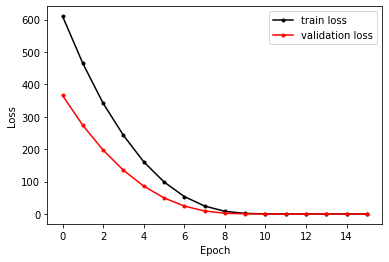

MSE validation baseline model: 0.0015556107539970421
Final train loss: 0.05678730085492134
Final validation loss: 0.018451670184731483


In [115]:
plot_loss(lin_model, linear_history)

In [116]:
def linear_model(num_features, learning_rate, optimizer='SGD', l2_lambda=0.01, dropout_rate=0.3):
    tf.keras.backend.clear_session()
    tf.random.set_seed(0)
    
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(
        units=32,
        input_shape=[num_features],
        activation='relu',
        kernel_initializer='he_normal',
        bias_initializer='zeros',
        kernel_regularizer=tf.keras.regularizers.l2(l2_lambda)
    ))
    
    model.add(tf.keras.layers.Dense(
        units=1,
        activation='linear',
        kernel_initializer='he_normal',
        bias_initializer='zeros',
        kernel_regularizer=tf.keras.regularizers.l2(l2_lambda)
    ))

    if optimizer == 'SGD':
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer == 'Adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
        
    model.compile(loss='mse', optimizer=optimizer)
    
    return model

In [117]:
np.random.seed(0)
tf.random.set_seed(0)

x_features = crypto_train_X_bitcoin_scaled.shape[1]

lin_model = linear_model(num_features=x_features, learning_rate=0.0001, optimizer='Adam', l2_lambda=0.01, dropout_rate=0.3)

early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

linear_history = lin_model.fit(
    x=crypto_train_X_bitcoin_scaled,
    y=crypto_train_Y_bitcoin_scaled,
    epochs=100,
    verbose=1,
    batch_size=64,
    validation_data=(crypto_val_X_bitcoin_scaled, crypto_val_Y_bitcoin_scaled),
    callbacks=[early_stop]
)

Epoch 1/100
1260/1260 [==============================] - 2s 1ms/step - loss: 0.4077 - val_loss: 0.2115
Epoch 2/100
1260/1260 [==============================] - 1s 1ms/step - loss: 0.1198 - val_loss: 0.0571
Epoch 3/100
1260/1260 [==============================] - 2s 1ms/step - loss: 0.0308 - val_loss: 0.0140
Epoch 4/100
1260/1260 [==============================] - 1s 1ms/step - loss: 0.0085 - val_loss: 0.0050
Epoch 5/100
1260/1260 [==============================] - 1s 1ms/step - loss: 0.0040 - val_loss: 0.0031
Epoch 6/100
1260/1260 [==============================] - 1s 1ms/step - loss: 0.0030 - val_loss: 0.0025
Epoch 7/100
1260/1260 [==============================] - 1s 1ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 8/100
1260/1260 [==============================] - 1s 1ms/step - loss: 0.0023 - val_loss: 0.0020
Epoch 9/100
1260/1260 [==============================] - 1s 1ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 10/100
1260/1260 [==============================] - 1s 1ms/step - l

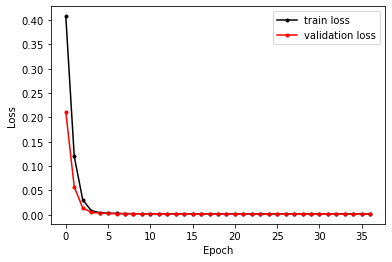

MSE validation baseline model: 0.0015556107539970421
Final train loss: 0.0017317099263891578
Final validation loss: 0.001556695788167417


In [118]:
plot_loss(lin_model, linear_history)